In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [81]:
df = pd.read_csv('marketing_data.csv')
df.head()

ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2014-06-16        0       189  ...                  6                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2014-05-13        0       134  ...                  5                  2   
3  2014-05-11        0        10  ...                  2                  7   
4  2014-04-08        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain    Country  
0         1         0      Spain  
1         1         0     Canada  
2         0         0        USA  
3         0         0  Australia  
4         1         0      Spain  

[5 rows x 28 columns]

In [82]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [83]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
 Income                float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [84]:
df.shape[0]

2240

In [85]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [86]:
df[df[" Income " ].isna()]

ID  Year_Birth   Education Marital_Status   Income   Kidhome  \
134    8996        1957         PhD        Married       NaN        2   
262    1994        1983  Graduation        Married       NaN        1   
394    3769        1972         PhD       Together       NaN        1   
449    5255        1986  Graduation         Single       NaN        1   
525    8268        1961         PhD        Married       NaN        0   
590   10629        1973    2n Cycle        Married       NaN        1   
899   10475        1970      Master       Together       NaN        0   
997    9235        1957  Graduation         Single       NaN        1   
1096   4345        1964    2n Cycle         Single       NaN        1   
1185   7187        1969      Master       Together       NaN        1   
1213   8720        1978    2n Cycle       Together       NaN        0   
1312   8557        1982  Graduation         Single       NaN        1   
1515   2863        1970  Graduation         Single       NaN        1   
1558   2437        1989  Graduation        Married       NaN        0   
1693   5250        1943      Master          Widow       NaN        0   
1804   7281        1959         PhD         Single       NaN        0   
1858   1612        1981         PhD         Single       NaN        1   
1863   5079        1971  Graduation        Married       NaN        1   
1880  10339        1954      Master       Together       NaN        0   
1967   5798        1973      Master       Together       NaN        0   
1983   2902        1958  Graduation       Together       NaN        1   
2139   3117        1955  Graduation         Single       NaN        0   
2165   7244        1951  Graduation         Single       NaN        2   
2170   1295        1963  Graduation        Married       NaN        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
134          1  2012-11-19        4       230  ...                  8   
262          0  2013-11-15       11         5  ...                  2   
394          0  2014-03-02       17        25  ...                  3   
449          0  2013-02-20       19         5  ...                  0   
525          1  2013-07-11       23       352  ...                  7   
590          0  2012-09-14       25        25  ...                  3   
899          1  2013-04-01       39       187  ...                  6   
997          1  2014-05-27       45         7  ...                  2   
1096         1  2014-01-12       49         5  ...                  2   
1185         1  2013-05-18       52       375  ...                  4   
1213         0  2012-08-12       53        32  ...                  1   
1312         0  2013-06-17       57        11  ...                  3   
1515         2  2013-08-23       67       738  ...                 10   
1558         0  2013-06-03       69       861  ...                 12   
1693         0  2013-10-30       75       532  ...                 11   
1804         0  2013-11-05       80        81  ...                  4   
1858         0  2013-05-31       82        23  ...                  3   
1863         1  2013-03-03       82        71  ...                  3   
1880         1  2013-06-23       83       161  ...                  4   
1967         0  2013-11-23       87       445  ...                  8   
1983         1  2012-09-03       87        19  ...                  3   
2139         1  2013-10-18       95       264  ...                  5   
2165         1  2014-01-01       96        48  ...                  4   
2170         1  2013-08-11       96       231  ...                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
134                   9             0             0             0   
262                   7             0             0             0   
394                   7             0             0             0   
449                   1             0             0             0   
525         

In [87]:
# Clean and normalize dataframe
# Strip whitespace & lowercase column names, use underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Parse income values to numeric handling $, commas, spaces and parentheses for negatives
import pandas as pd

def _parse_income(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip()
    neg = False
    if s.startswith('(') and s.endswith(')'):
        neg = True
        s = s[1:-1]
    s = s.replace('$', '').replace(',', '').replace(' ', '')
    try:
        val = float(s)
        return -val if neg else val
    except Exception:
        return pd.NA

if 'income' in df.columns:
    df['income'] = df['income'].apply(_parse_income)
else:
    for col in df.columns:
        if 'income' in col:
            df.rename(columns={col: 'income'}, inplace=True)
            df['income'] = df['income'].apply(_parse_income)
            break


df = df.dropna(subset=['income']).reset_index(drop=True)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

df.head()

id  year_birth   education marital_status   income  kidhome  teenhome  \
0   1826        1970  graduation       divorced  84835.0        0         0   
1      1        1961  graduation         single  57091.0        0         0   
2  10476        1958  graduation        married  67267.0        0         1   
3   1386        1967  graduation       together  32474.0        1         1   
4   5371        1989  graduation         single  21474.0        1         0   

  dt_customer  recency  mntwines  ...  numstorepurchases  numwebvisitsmonth  \
0  2014-06-16        0       189  ...                  6                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2014-05-13        0       134  ...                  5                  2   
3  2014-05-11        0        10  ...                  2                  7   
4  2014-04-08        0         6  ...                  2                  7   

   acceptedcmp3  acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   response  complain    country  
0         1         0      spain  
1         1         0     canada  
2         0         0        usa  
3         0         0  australia  
4         1         0      spain  

[5 rows x 28 columns]

In [88]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [89]:
spend_cols = [
    'mntwines',
    'mntfruits',
    'mntmeatproducts',
    'mntfishproducts',
    'mntsweetproducts',
    'mntgoldprods'
]

df['total_spend'] = df[spend_cols].sum(axis=1)


In [90]:
df['income'] = (
    df['income']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .astype(float)
)

In [91]:
df['age'] = 2025 - df['year_birth']

In [92]:
df = df.sort_values('age', ascending=False).iloc[3:]
df

id  year_birth   education marital_status    income  kidhome  \
2147  6663        1940         phd         single  511410.0        0   
1725  6932        1941         phd        married  930270.0        0   
1463  6142        1943      master        married  650730.0        0   
1630  7106        1943         phd        married  758650.0        0   
1338  1453        1943         phd          widow  575130.0        0   
...    ...         ...         ...            ...       ...      ...   
957   3661        1995    2n cycle         single  806170.0        0   
1287  4427        1995    2n cycle         single  832570.0        0   
1456  5184        1995  graduation         single  348240.0        0   
1808   193        1996       basic        married  144210.0        0   
557   9909        1996    2n cycle        married   75000.0        0   

      teenhome dt_customer  recency  mntwines  ...  acceptedcmp3  \
2147         0  2013-07-08       96       144  ...             0   
1725         0  2013-04-13       77      1285  ...             0   
1463         0  2013-08-20       65       629  ...             0   
1630         0  2014-03-31       73       483  ...             0   
1338         0  2013-07-06       59       735  ...             0   
...        ...         ...      ...       ...  ...           ...   
957          0  2012-10-12       42       594  ...             0   
1287         0  2012-09-18       56       536  ...             1   
1456         0  2014-03-26       65         4  ...             0   
1808         0  2014-02-17       81         0  ...             1   
557          0  2012-11-09       24         3  ...             0   

      acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  response  \
2147             0             0             0             0         0   
1725             0             1             0             0         0   
1463             0             0             0             0         0   
1630             0             0             0             0         0   
1338             0             0             0             0         0   
...            ...           ...           ...           ...       ...   
957              0             0             0             0         0   
1287             0             1             0             0         1   
1456             0             0             0             0         0   
1808             0             0             0             0         0   
557              0             0             0             0         1   

      complain    country  total_spend  age  
2147         0      spain          157   85  
1725         0      spain         2119   84  
1463         1      spain          900   82  
1630         0      spain         1242   82  
1338         0      spain         1060   82  
...        ...        ...          ...  ...  
957          0      india         1435   30  
1287         1      spain         1365   30  
1456         0      spain           23   30  
1808         0      spain           16   29  
557          0  australia          122   29  

[2213 rows x 30 columns]

In [93]:
# numeric columns
num_cols = ['income',
     'mntwines','total_spend','recency','mntmeatproducts',
    'mntfruits','mntfishproducts','mntsweetproducts','mntgoldprods',
    'numdealspurchases','numwebpurchases','numcatalogpurchases',
    'numstorepurchases'
]

df_num = df[num_cols]


def Removeoutlier(low, high):
    # compute IQR bounds
    q1 = df_num.quantile(0.25)
    q3 = df_num.quantile(0.75)
    IQR = q3 - q1

    lower = q1 - IQR * low
    upper = q3 + IQR * high

    # keep rows where ALL numeric columns are within bounds
    mask = (df_num >= lower) & (df_num <= upper)
    filtered = df[mask.all(axis=1)]
    return filtered


# Example usage:
df = Removeoutlier(1.5, 1.5)
df.head()


id  year_birth   education marital_status    income  kidhome  \
2147  6663        1940         phd         single  511410.0        0   
1463  6142        1943      master        married  650730.0        0   
1338  1453        1943         phd          widow  575130.0        0   
498   1740        1944  graduation        married  559560.0        0   
1905  6605        1944         phd       divorced  556140.0        0   

      teenhome dt_customer  recency  mntwines  ...  acceptedcmp3  \
2147         0  2013-07-08       96       144  ...             0   
1463         0  2013-08-20       65       629  ...             0   
1338         0  2013-07-06       59       735  ...             0   
498          0  2014-04-07       22       760  ...             0   
1905         0  2013-11-27       85       504  ...             0   

      acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  response  \
2147             0             0             0             0         0   
1463             0             0             0             0         0   
1338             0             0             0             0         0   
498              1             0             0             0         0   
1905             1             0             0             0         0   

      complain  country  total_spend  age  
2147         0    spain          157   85  
1463         1    spain          900   82  
1338         0    spain         1060   82  
498          0    spain          999   81  
1905         0    spain          682   81  

[5 rows x 30 columns]

In [94]:
df.shape[0]

1510

In [95]:
df['total_spend'].mean()

np.float64(313.9887417218543)

In [96]:
df.head()

id  year_birth   education marital_status    income  kidhome  \
2147  6663        1940         phd         single  511410.0        0   
1463  6142        1943      master        married  650730.0        0   
1338  1453        1943         phd          widow  575130.0        0   
498   1740        1944  graduation        married  559560.0        0   
1905  6605        1944         phd       divorced  556140.0        0   

      teenhome dt_customer  recency  mntwines  ...  acceptedcmp3  \
2147         0  2013-07-08       96       144  ...             0   
1463         0  2013-08-20       65       629  ...             0   
1338         0  2013-07-06       59       735  ...             0   
498          0  2014-04-07       22       760  ...             0   
1905         0  2013-11-27       85       504  ...             0   

      acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  response  \
2147             0             0             0             0         0   
1463             0             0             0             0         0   
1338             0             0             0             0         0   
498              1             0             0             0         0   
1905             1             0             0             0         0   

      complain  country  total_spend  age  
2147         0    spain          157   85  
1463         1    spain          900   82  
1338         0    spain         1060   82  
498          0    spain          999   81  
1905         0    spain          682   81  

[5 rows x 30 columns]

In [97]:

num_cols = [
     'mntwines','total_spend','mntmeatproducts',
    'mntfruits','mntfishproducts','mntsweetproducts','mntgoldprods'
]

df_num = df[num_cols]


def Removeoutlier(low, high):
    # compute IQR bounds
    q1 = df_num.quantile(0.25)
    q3 = df_num.quantile(0.75)
    IQR = q3 - q1

    lower = q1 - IQR * low
    upper = q3 + IQR * high

    # keep rows where ALL numeric columns are within bounds
    mask = (df_num >= lower) & (df_num <= upper)
    filtered = df[mask.all(axis=1)]
    return filtered





In [98]:
df = Removeoutlier(2.5,2.5)
df

id  year_birth   education marital_status    income  kidhome  \
2147  6663        1940         phd         single  511410.0        0   
498   1740        1944  graduation        married  559560.0        0   
1905  6605        1944         phd       divorced  556140.0        0   
2007  4587        1944      master          widow  450060.0        0   
208    263        1945         phd         single  455760.0        0   
...    ...         ...         ...            ...       ...      ...   
238   1384        1992       basic        married  172560.0        1   
1455  8315        1995  graduation         single  348240.0        0   
1456  5184        1995  graduation         single  348240.0        0   
1808   193        1996       basic        married  144210.0        0   
557   9909        1996    2n cycle        married   75000.0        0   

      teenhome dt_customer  recency  mntwines  ...  acceptedcmp3  \
2147         0  2013-07-08       96       144  ...             0   
498          0  2014-04-07       22       760  ...             0   
1905         0  2013-11-27       85       504  ...             0   
2007         0  2013-07-18       90       162  ...             0   
208          0  2014-05-28        9        56  ...             0   
...        ...         ...      ...       ...  ...           ...   
238          0  2013-11-23       10         6  ...             1   
1455         0  2014-03-26       65         4  ...             0   
1456         0  2014-03-26       65         4  ...             0   
1808         0  2014-02-17       81         0  ...             1   
557          0  2012-11-09       24         3  ...             0   

      acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  response  \
2147             0             0             0             0         0   
498              1             0             0             0         0   
1905             1             0             0             0         0   
2007             0             0             0             0         0   
208              0             0             0             0         1   
...            ...           ...           ...           ...       ...   
238              0             0             0             0         0   
1455             0             0             0             0         0   
1456             0             0             0             0         0   
1808             0             0             0             0         0   
557              0             0             0             0         1   

      complain    country  total_spend  age  
2147         0      spain          157   85  
498          0      spain          999   81  
1905         0      spain          682   81  
2007         0      spain          266   81  
208          0      spain          145   80  
...        ...        ...          ...  ...  
238          0        usa           62   33  
1455         0        usa           23   30  
1456         0      spain           23   30  
1808         0      spain           16   29  
557          0  australia          122   29  

[1237 rows x 30 columns]

# Group-bys

In [99]:
df.groupby('complain').agg('count').reset_index()

complain    id  year_birth  education  marital_status  income  kidhome  \
0         0  1225        1225       1225            1225    1225     1225   
1         1    12          12         12              12      12       12   

   teenhome  dt_customer  recency  ...  numwebvisitsmonth  acceptedcmp3  \
0      1225         1225     1225  ...               1225          1225   
1        12           12       12  ...                 12            12   

   acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  response  country  \
0          1225          1225          1225          1225      1225     1225   
1            12            12            12            12        12       12   

   total_spend   age  
0         1225  1225  
1           12    12  

[2 rows x 30 columns]

In [100]:
df_age = df.groupby('age').agg('count').reset_index()
df_age

age  id  year_birth  education  marital_status  income  kidhome  teenhome  \
0    29   2           2          2               2       2        2         2   
1    30   2           2          2               2       2        2         2   
2    33   7           7          7               7       7        7         7   
3    34   3           3          3               3       3        3         3   
4    35  12          12         12              12      12       12        12   
5    36  18          18         18              18      18       18        18   
6    37  16          16         16              16      16       16        16   
7    38  14          14         14              14      14       14        14   
8    39  28          28         28              28      28       28        28   
9    40  23          23         23              23      23       23        23   
10   41  26          26         26              26      26       26        26   
11   42  27          27         27              27      27       27        27   
12   43  19          19         19              19      19       19        19   
13   44  23          23         23              23      23       23        23   
14   45  24          24         24              24      24       24        24   
15   46  29          29         29              29      29       29        29   
16   47  48          48         48              48      48       48        48   
17   48  32          32         32              32      32       32        32   
18   49  56          56         56              56      56       56        56   
19   50  50          50         50              50      50       50        50   
20   51  45          45         45              45      45       45        45   
21   52  52          52         52              52      52       52        52   
22   53  50          50         50              50      50       50        50   
23   54  51          51         51              51      51       51        51   
24   55  44          44         44              44      44       44        44   
25   56  37          37         37              37      37       37        37   
26   57  33          33         33              33      33       33        33   
27   58  23          23         23              23      23       23        23   
28   59  30          30         30              30      30       30        30   
29   60  40          40         40              40      40       40        40   
30   61  22          22         22              22      22       22        22   
31   62  26          26         26              26      26       26        26   
32   63  17          17         17              17      17       17        17   
33   64  16          16         16              16      16       16        16   
34   65  30          30         30              30      30       30        30   
35   66  22          22         22              22      22       22        22   
36   67  23          23         23              23      23       23        23   
37   68  24          24         24              24      24       24        24   
38   69  27          27         27              27      27       27        27   
39   70  24          24         24              24      24       24        24   
40   71  21          21         21              21      21       21        21   
41   72  16          16         16              16      16       16        16   
42   73  26          26         26              26      26       26        26   
43   74  21          21         21              21      21       21        21   
44   75  23          23         23              23      23       23        23   
45   76  12          12         12              12      12       12        12   
46   77  10          10         10              10      10       10        10   
47   78   4           4          4               4       4        4         4   
48   79   4           4          4 

# EDA + Plots

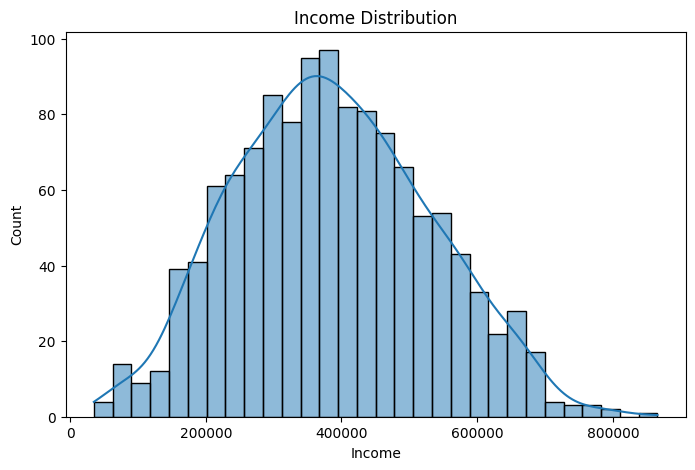

In [101]:
plt.figure(figsize=(8,5))
sns.histplot(df['income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


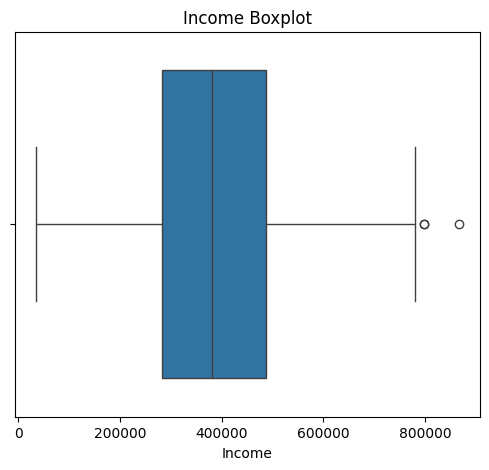

In [102]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df['income'])
plt.title("Income Boxplot")
plt.xlabel("Income")
plt.show()


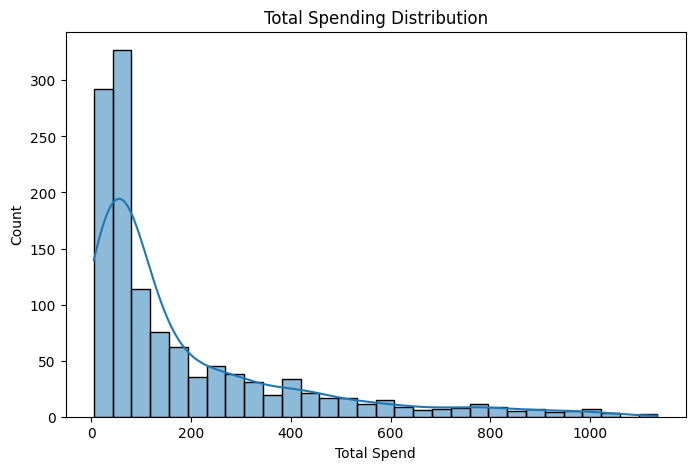

In [103]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_spend'], bins=30, kde=True)
plt.title("Total Spending Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Count")
plt.show()


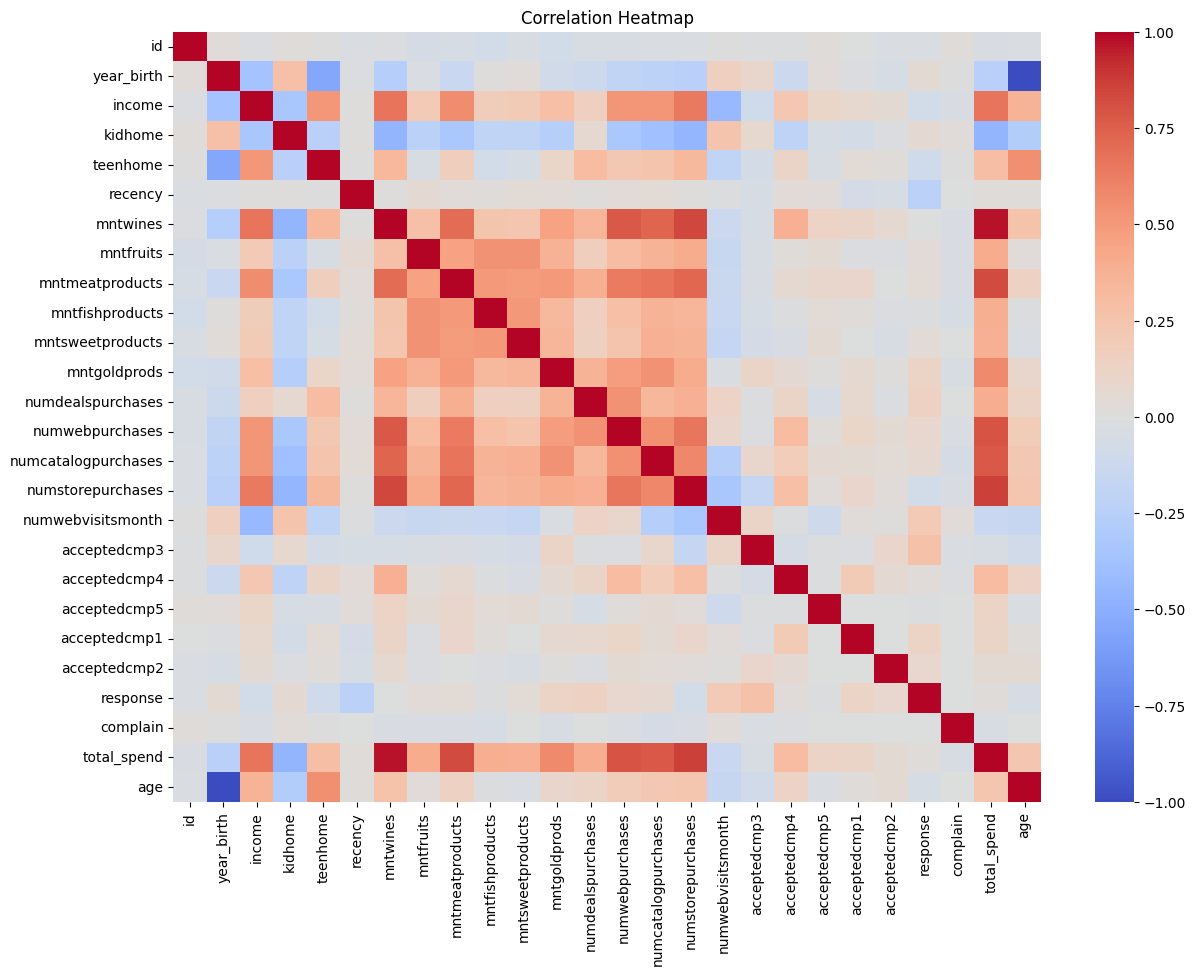

In [104]:
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


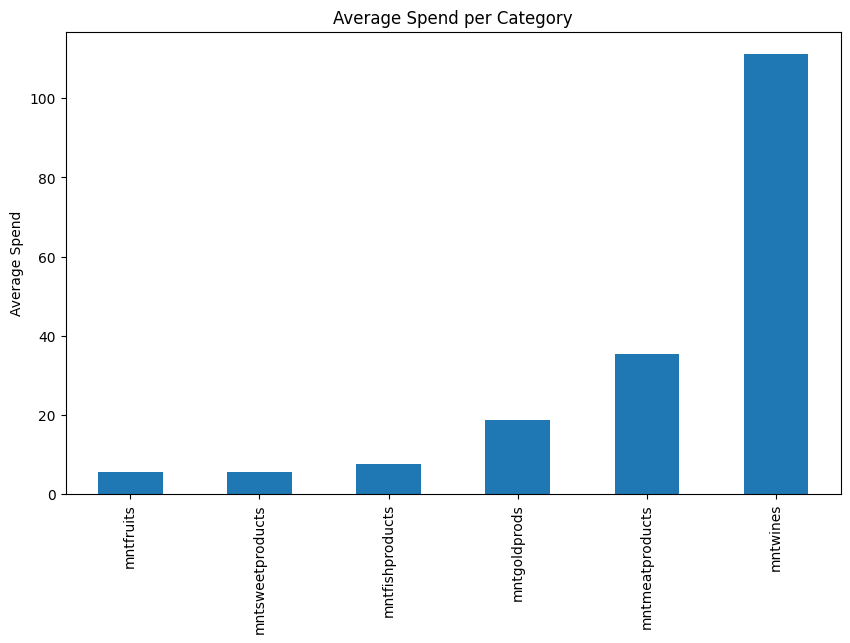

In [105]:
plt.figure(figsize=(10,6))
spend_cols = ['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']
df[spend_cols].mean().sort_values().plot(kind='bar')
plt.title("Average Spend per Category")
plt.ylabel("Average Spend")
plt.show()


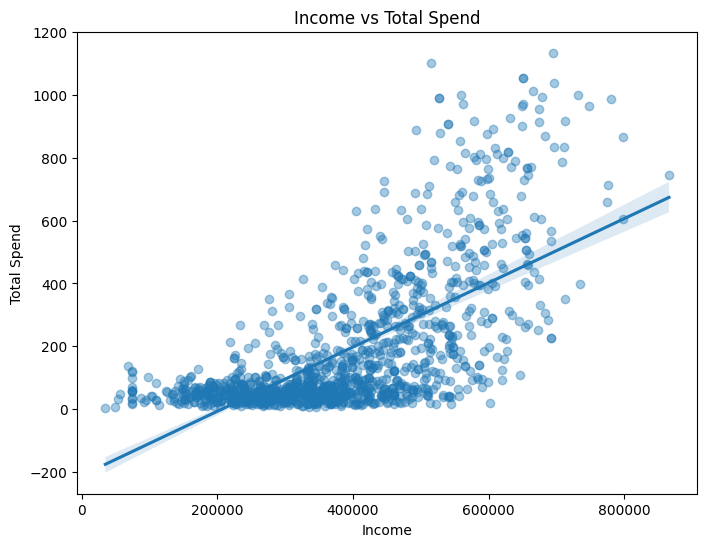

In [106]:
plt.figure(figsize=(8,6))
sns.regplot(x='income', y='total_spend', data=df, scatter_kws={'alpha':0.4})
plt.title("Income vs Total Spend")
plt.xlabel("Income")
plt.ylabel("Total Spend")
plt.show()


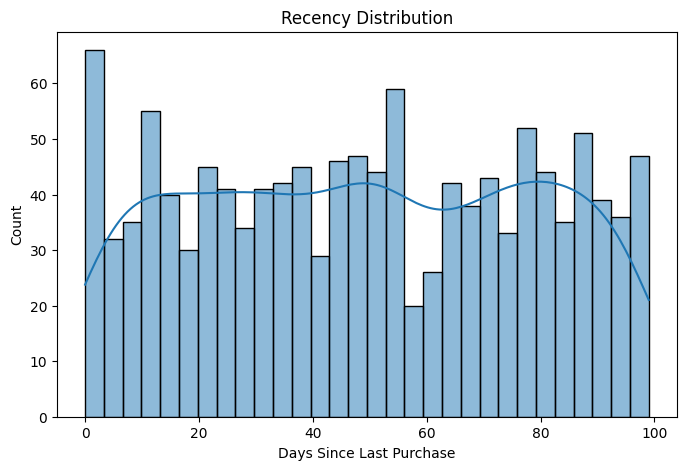

In [107]:
plt.figure(figsize=(8,5))
sns.histplot(df['recency'], bins=30, kde=True)
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Count")
plt.show()


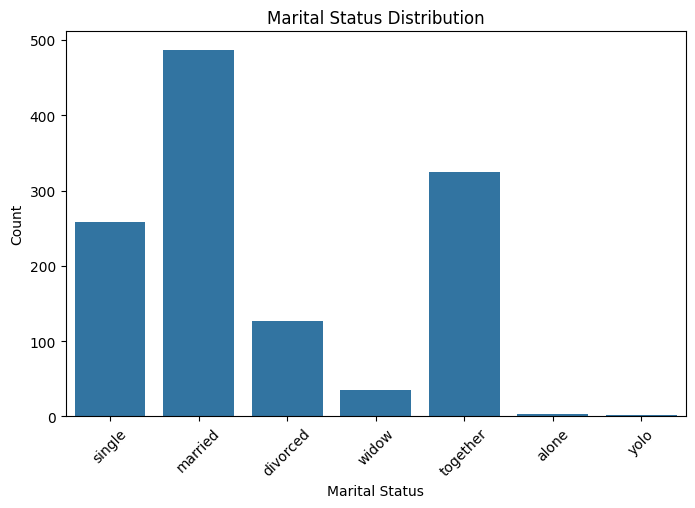

In [108]:
plt.figure(figsize=(8,5))
sns.countplot(x='marital_status', data=df)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


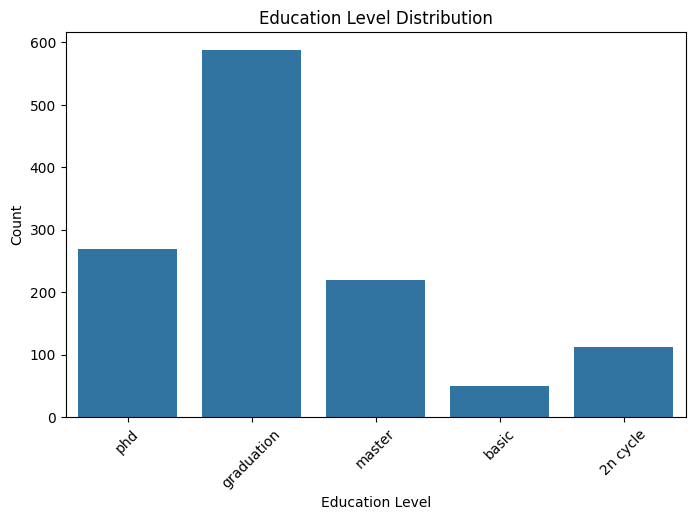

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(x='education', data=df)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


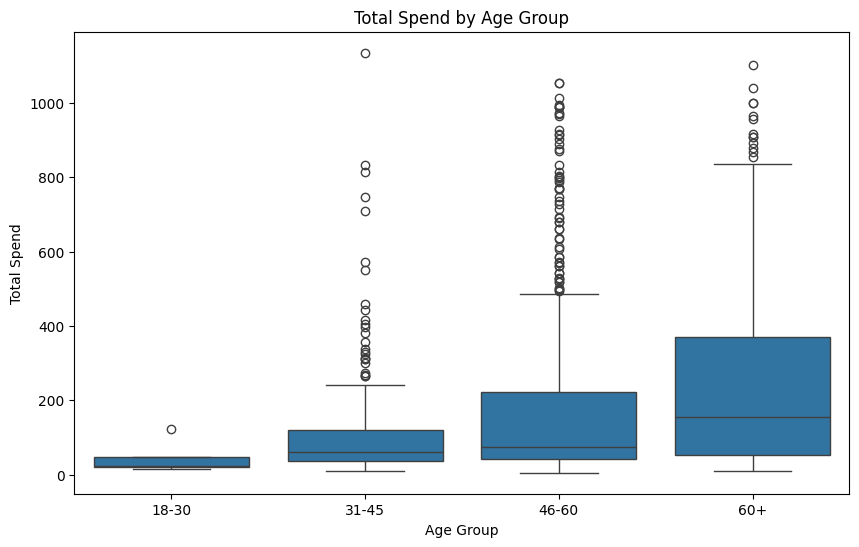

In [110]:
plt.figure(figsize=(10,6))
df['age_group'] = pd.cut(df['age'], bins=[0,30,45,60,100], labels=['18-30','31-45','46-60','60+'])
sns.boxplot(x='age_group', y='total_spend', data=df)
plt.title("Total Spend by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spend")
plt.show()


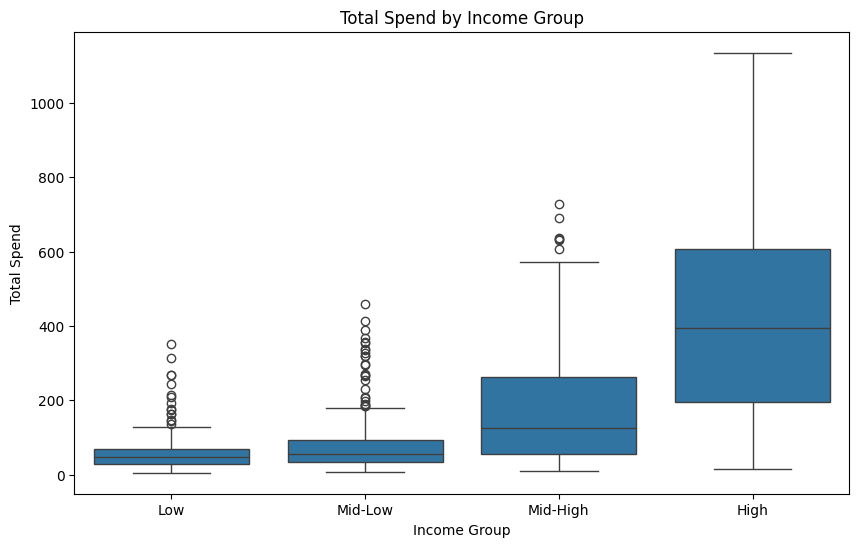

In [111]:
plt.figure(figsize=(10,6))
df['income_group'] = pd.qcut(df['income'], 4, labels=['Low','Mid-Low','Mid-High','High'])
sns.boxplot(x='income_group', y='total_spend', data=df)
plt.title("Total Spend by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Total Spend")
plt.show()


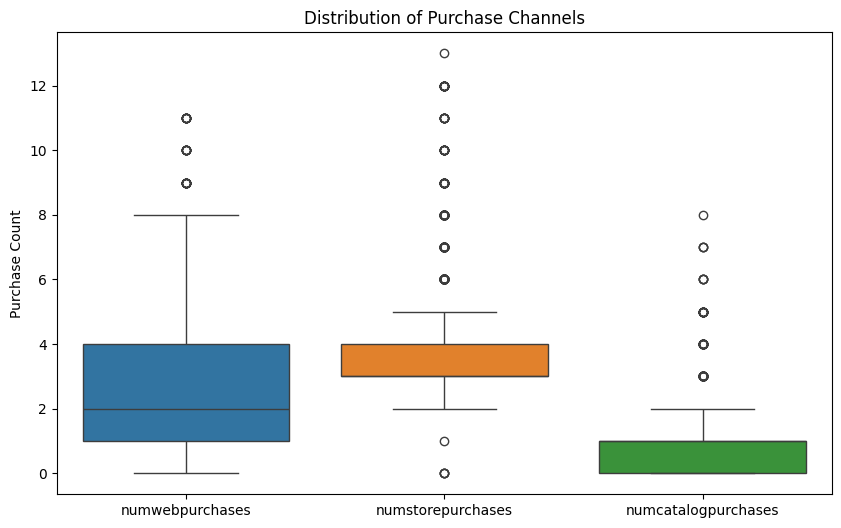

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['numwebpurchases','numstorepurchases','numcatalogpurchases']])
plt.title("Distribution of Purchase Channels")
plt.ylabel("Purchase Count")
plt.show()


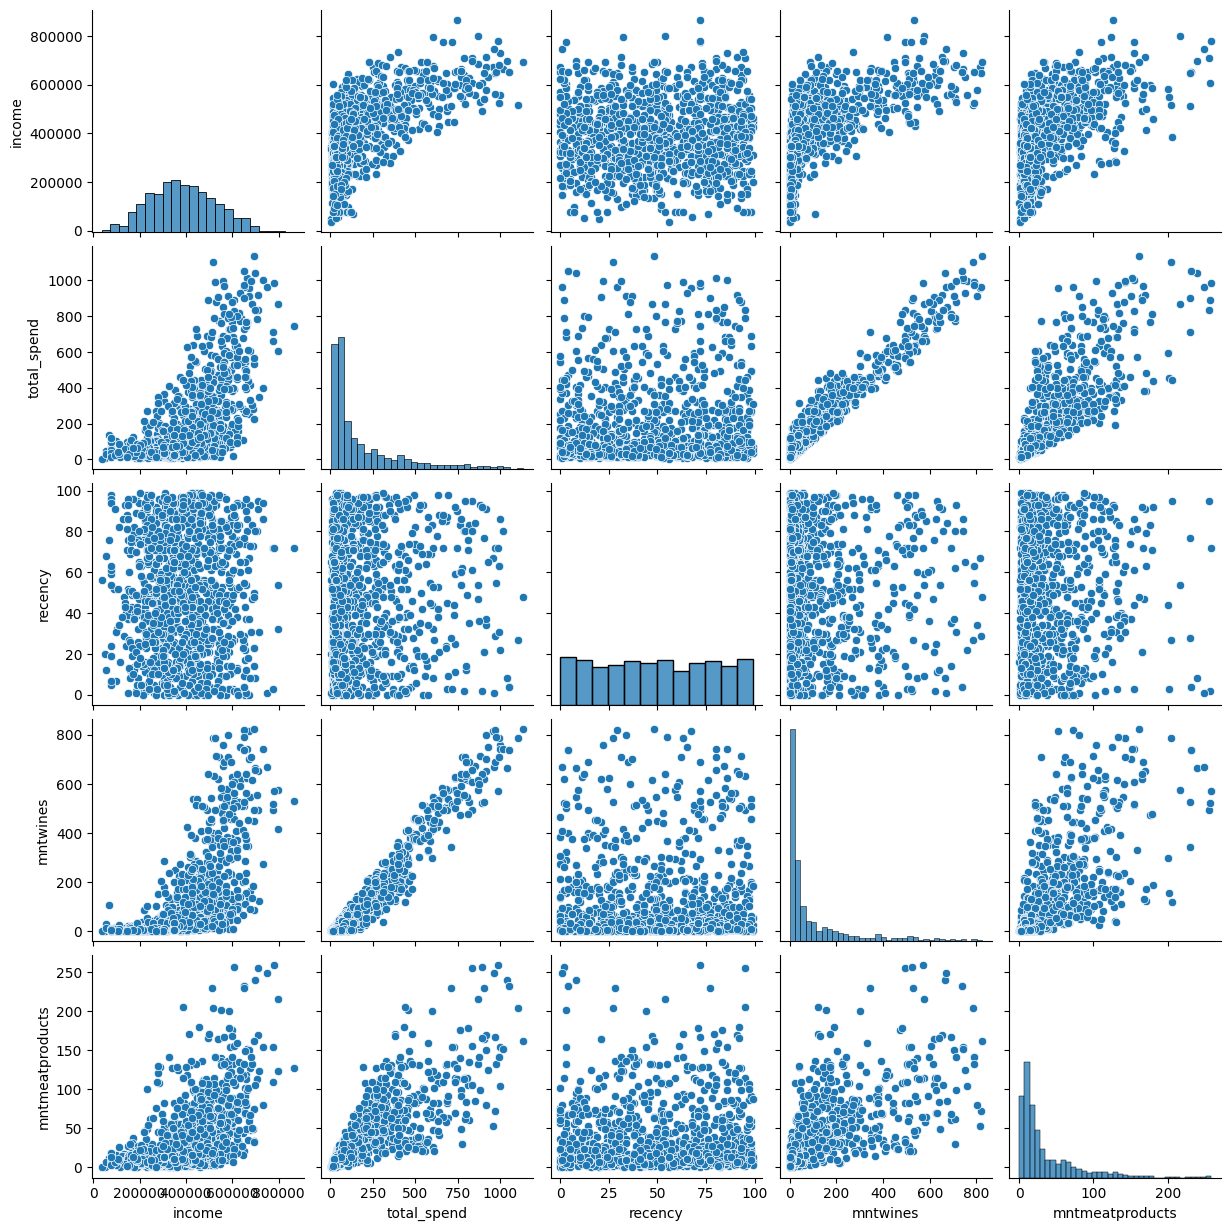

In [113]:
sns.pairplot(df[['income','total_spend','recency','mntwines','mntmeatproducts']])
plt.show()


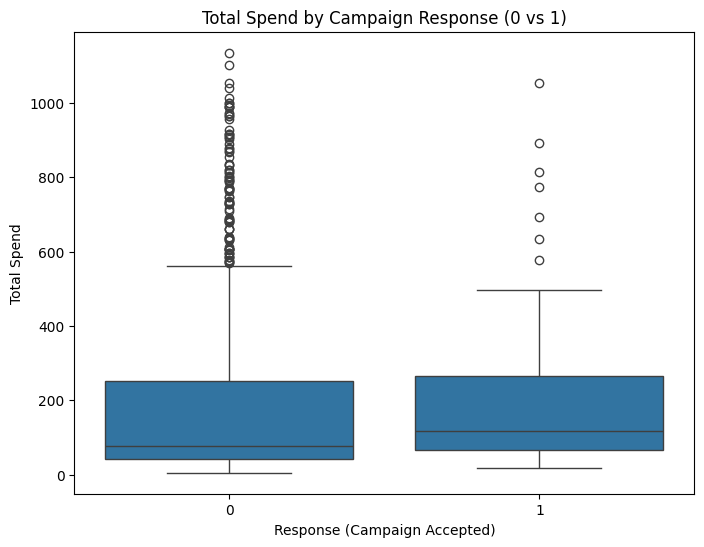

In [114]:
plt.figure(figsize=(8,6))
sns.boxplot(x='response', y='total_spend', data=df)
plt.title("Total Spend by Campaign Response (0 vs 1)")
plt.xlabel("Response (Campaign Accepted)")
plt.ylabel("Total Spend")
plt.show()


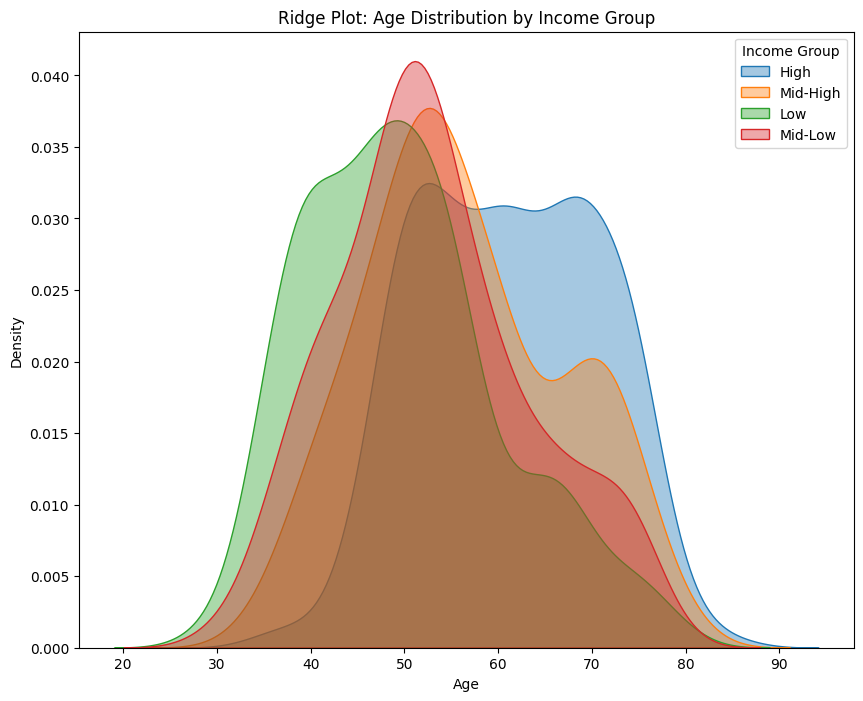

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

df['income_group'] = pd.qcut(df['income'], 4, labels=['Low','Mid-Low','Mid-High','High'])

plt.figure(figsize=(10,8))
for group in df['income_group'].unique():
    subset = df[df['income_group'] == group]['age']
    sns.kdeplot(subset, fill=True, alpha=0.4, label=str(group))

plt.title("Ridge Plot: Age Distribution by Income Group")
plt.xlabel("Age")
plt.legend(title="Income Group")
plt.show()


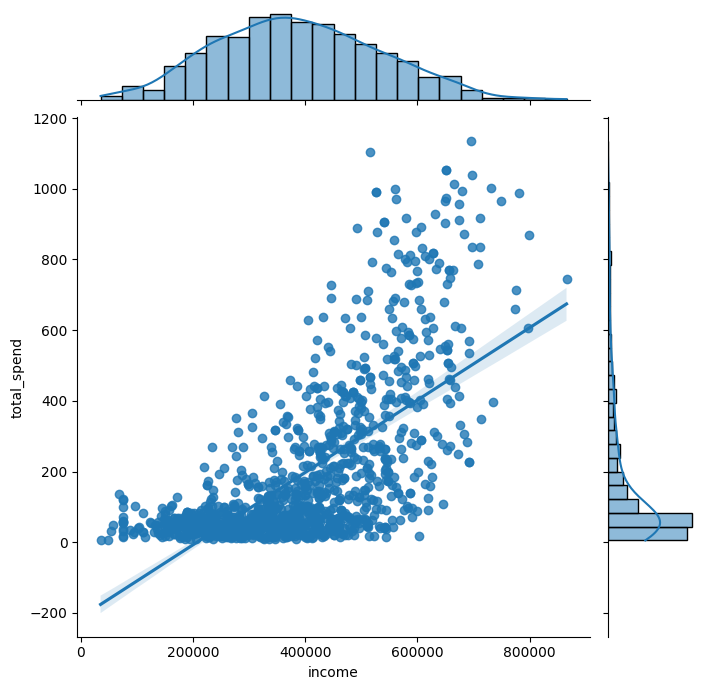

In [116]:
sns.jointplot(
    data=df,
    x="income",
    y="total_spend",
    kind="reg",
    height=7
)
plt.show()


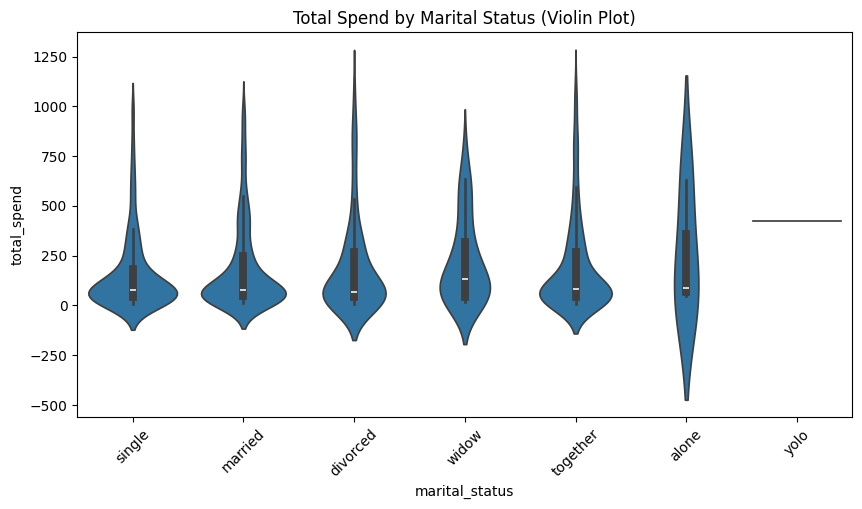

In [117]:
plt.figure(figsize=(10,5))
sns.violinplot(x='marital_status', y='total_spend', data=df)
plt.xticks(rotation=45)
plt.title("Total Spend by Marital Status (Violin Plot)")
plt.show()


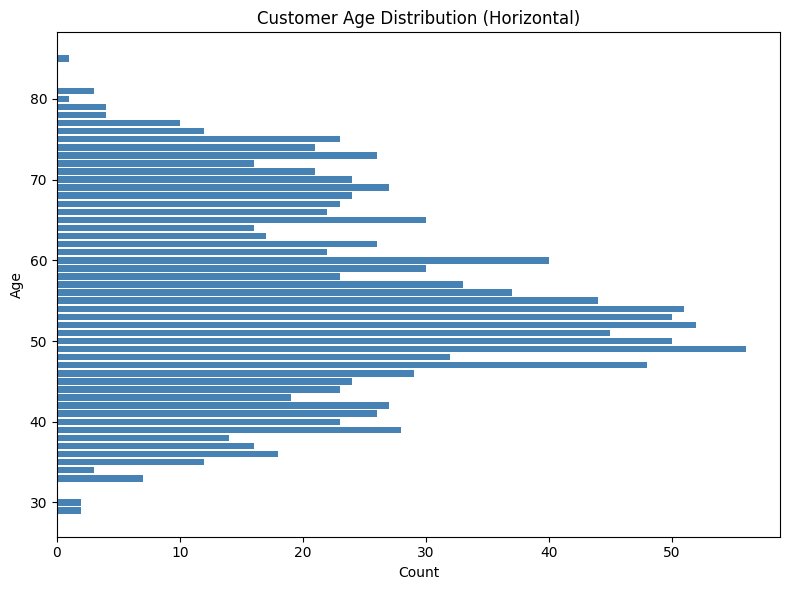

In [118]:
plt.figure(figsize=(8,6))
age_counts = df['age'].value_counts().sort_index()

plt.barh(age_counts.index, age_counts.values, color="steelblue")
plt.title("Customer Age Distribution (Horizontal)")
plt.xlabel("Count")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


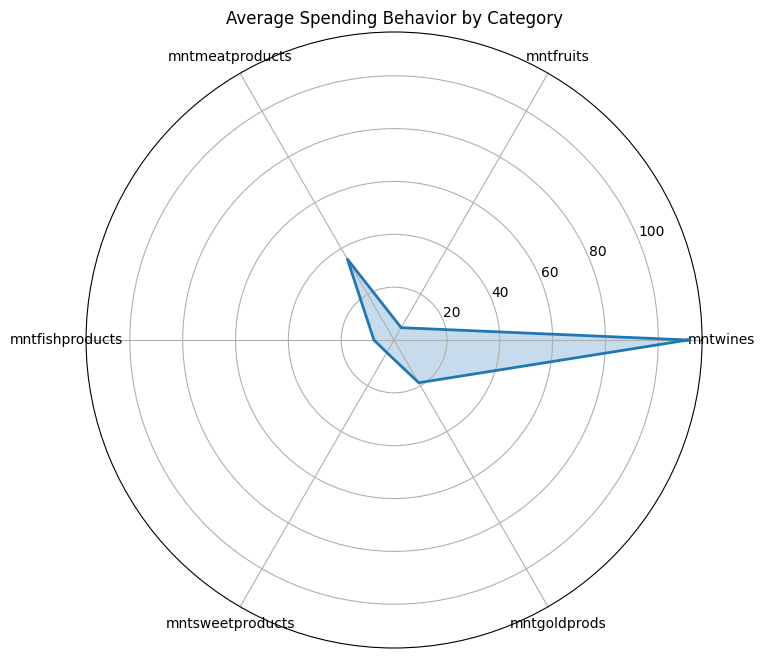

In [119]:
import numpy as np

spend_means = df[['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].mean()

labels = spend_means.index
values = spend_means.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Average Spending Behavior by Category")
plt.show()


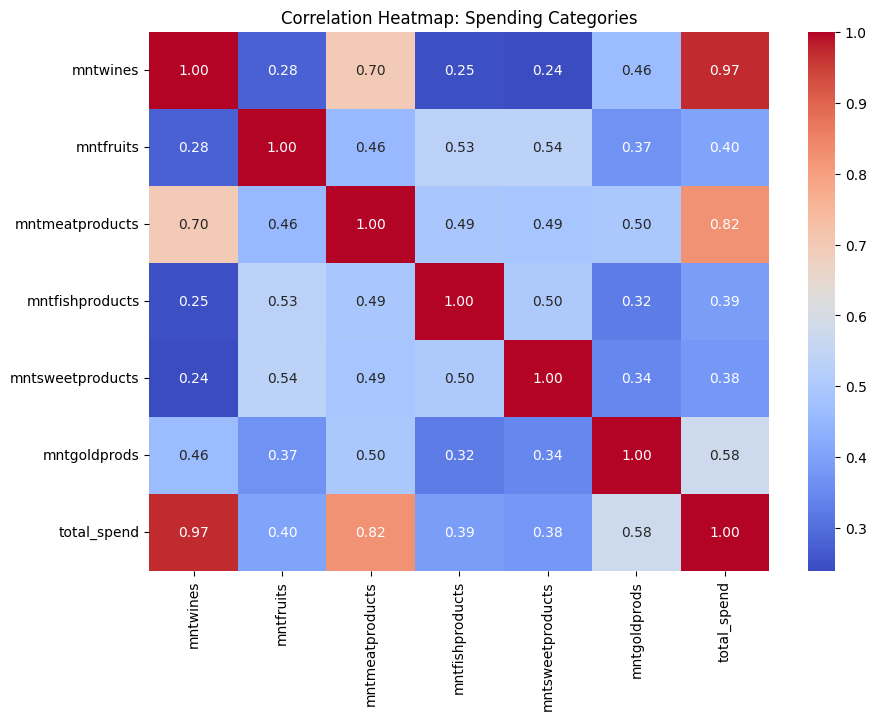

In [120]:
plt.figure(figsize=(10,7))
spend_cols = ['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods','total_spend']
corr = df[spend_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Spending Categories")
plt.show()


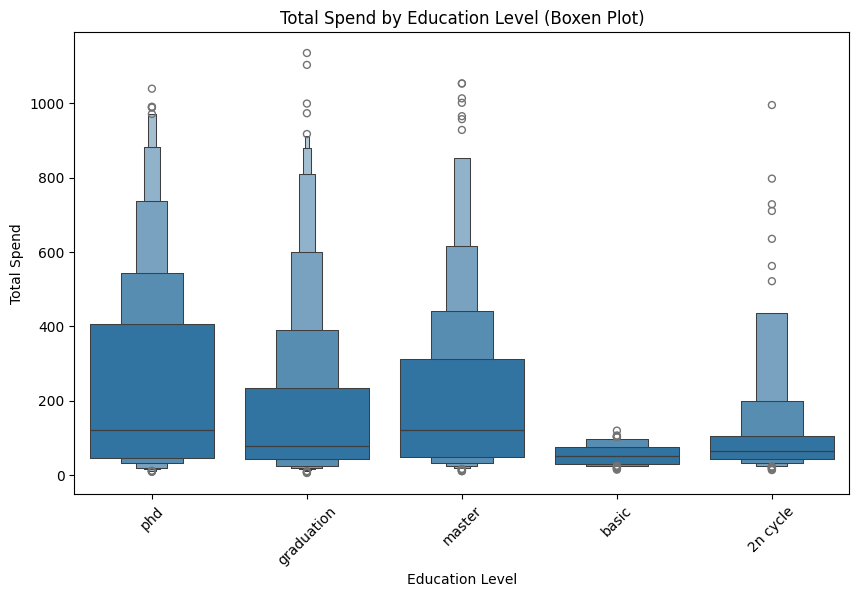

In [121]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='education', y='total_spend', data=df)
plt.title("Total Spend by Education Level (Boxen Plot)")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Total Spend")
plt.show()


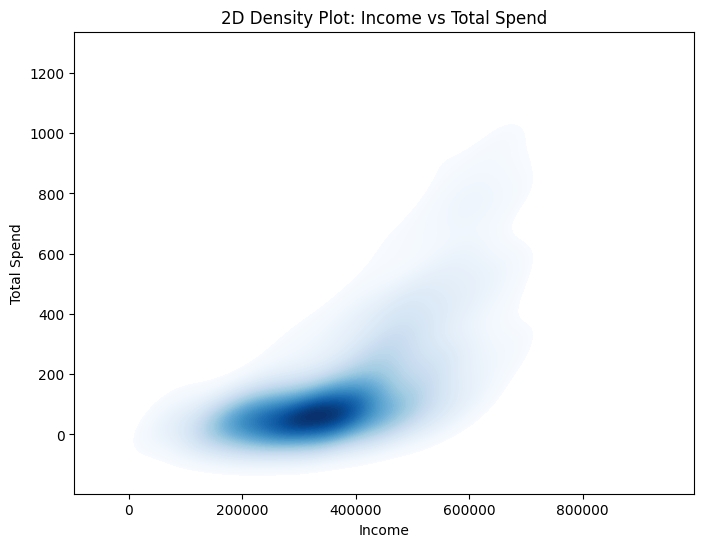

In [122]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['income'],
    y=df['total_spend'],
    fill=True,
    cmap="Blues",
    thresh=0.05,
    levels=100
)
plt.title("2D Density Plot: Income vs Total Spend")
plt.xlabel("Income")
plt.ylabel("Total Spend")
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.7% of the points cannot be placed

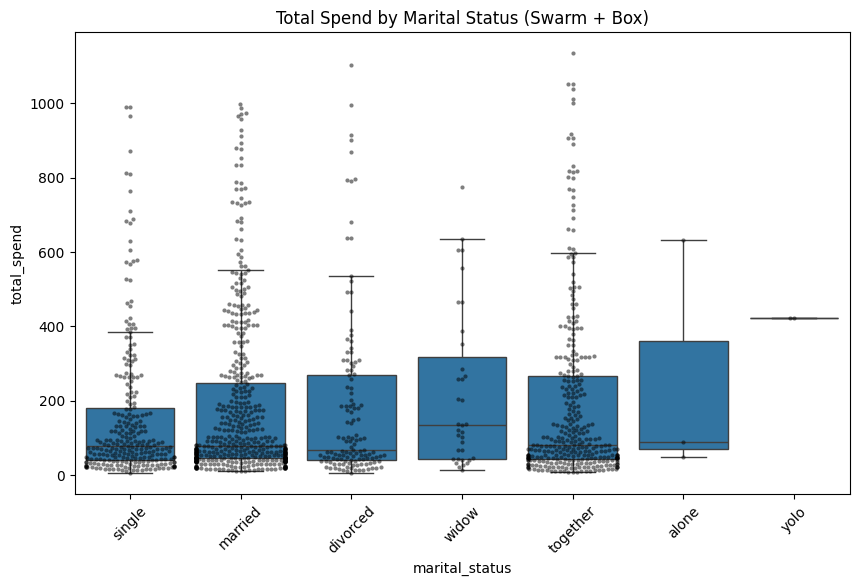

In [123]:
plt.figure(figsize=(10,6))
sns.boxplot(x='marital_status', y='total_spend', data=df, showfliers=False)
sns.swarmplot(x='marital_status', y='total_spend', data=df, color="black", alpha=0.5, size=3)
plt.title("Total Spend by Marital Status (Swarm + Box)")
plt.xticks(rotation=45)
plt.show()


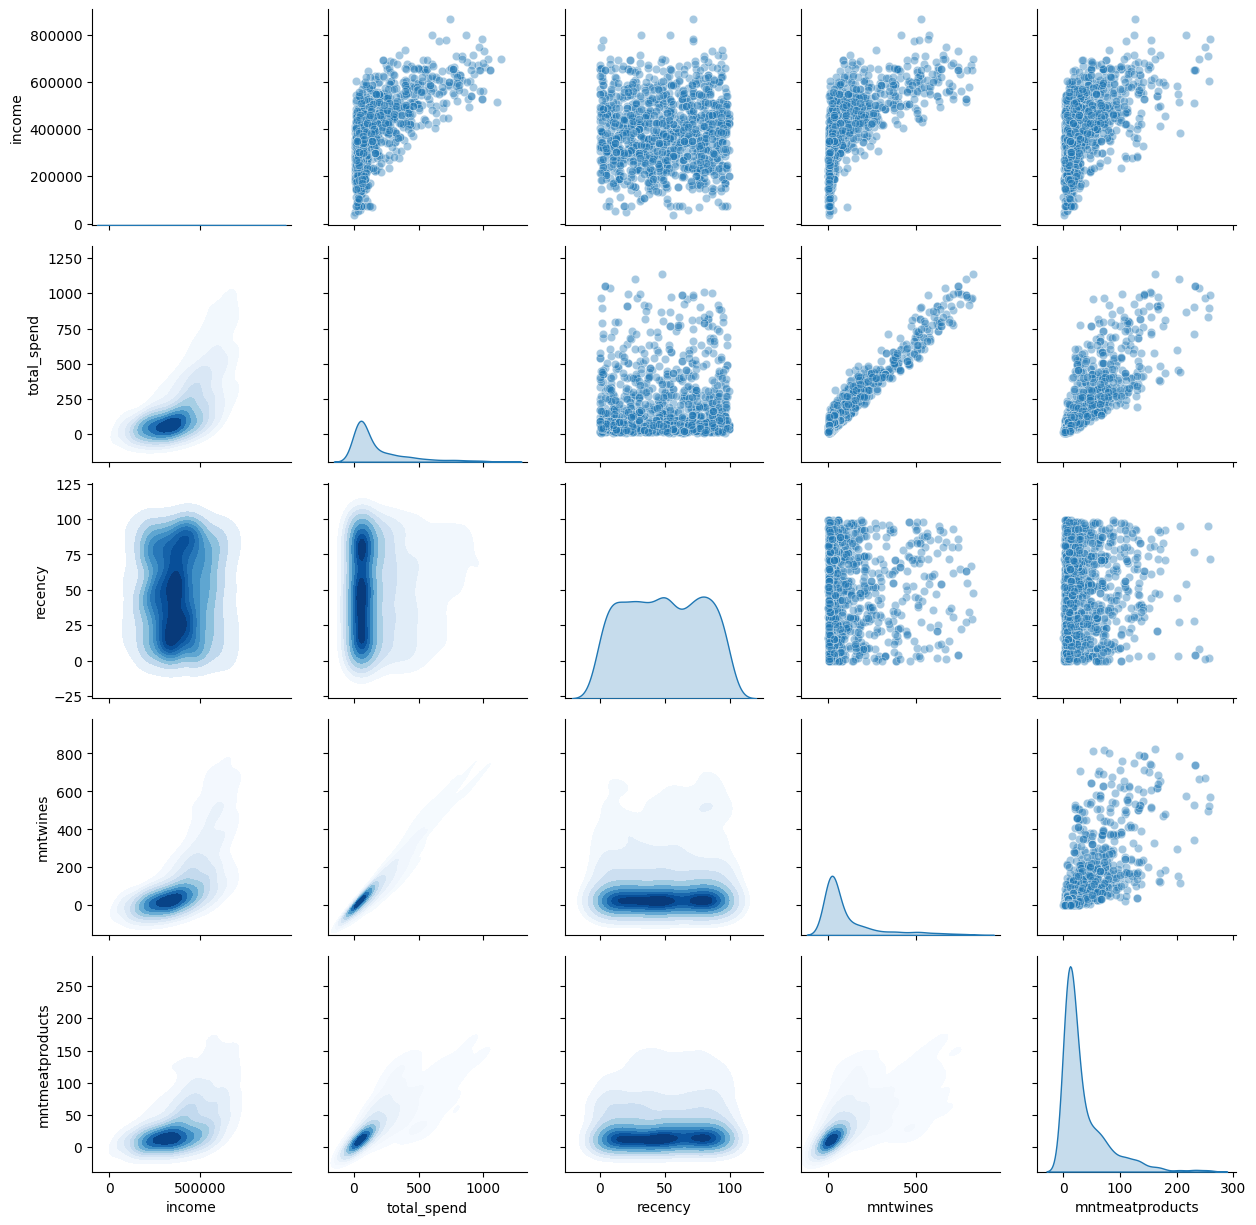

In [124]:
g = sns.PairGrid(df[['income','total_spend','recency','mntwines','mntmeatproducts']])
g.map_diag(sns.kdeplot, fill=True)
g.map_upper(sns.scatterplot, alpha=0.4)
g.map_lower(sns.kdeplot, fill=True, cmap="Blues")
plt.show()


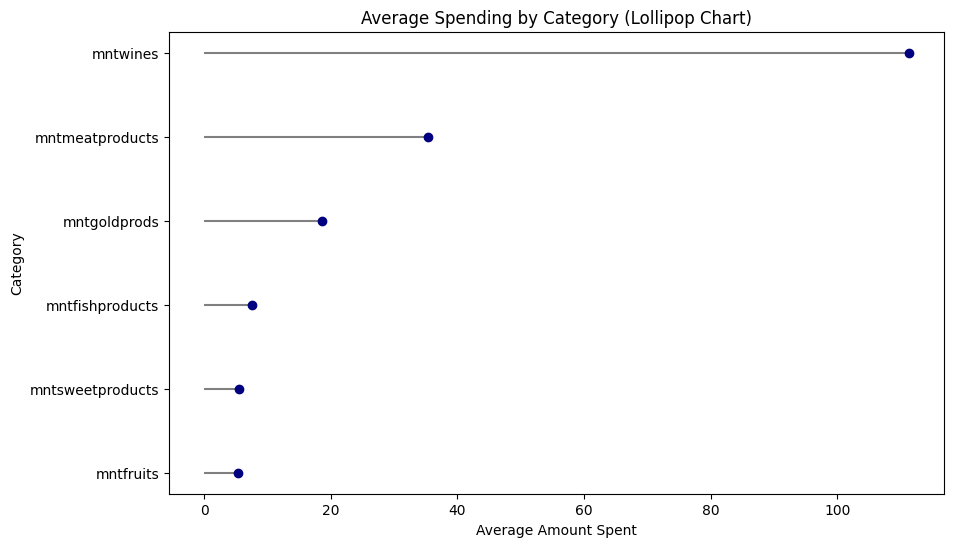

In [125]:
spend_means = df[['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].mean().sort_values()

plt.figure(figsize=(10,6))
plt.hlines(y=spend_means.index, xmin=0, xmax=spend_means.values, color='gray')
plt.plot(spend_means.values, spend_means.index, "o", color='navy')
plt.title("Average Spending by Category (Lollipop Chart)")
plt.xlabel("Average Amount Spent")
plt.ylabel("Category")
plt.show()


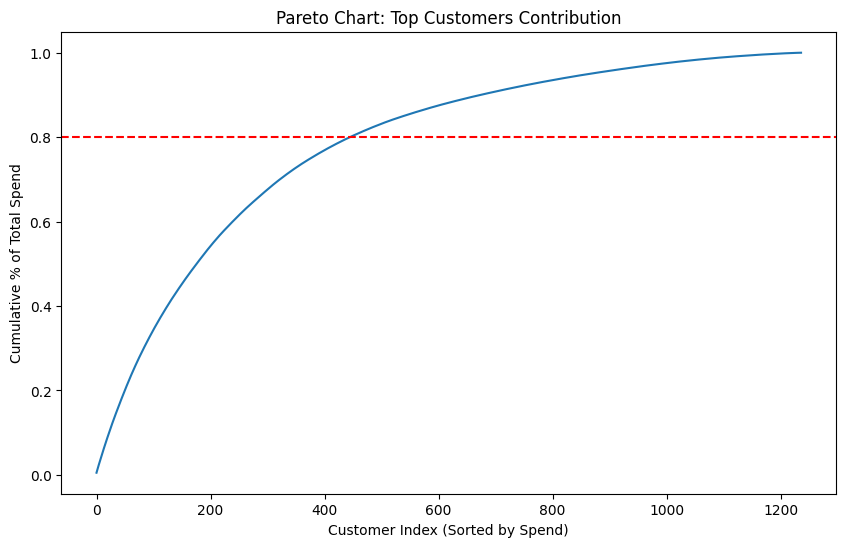

In [126]:
df_sorted = df.sort_values('total_spend', ascending=False)
df_sorted['cumulative_pct'] = df_sorted['total_spend'].cumsum() / df_sorted['total_spend'].sum()

plt.figure(figsize=(10,6))
plt.plot(df_sorted['cumulative_pct'].values)
plt.axhline(0.8, color='red', linestyle='--')
plt.title("Pareto Chart: Top Customers Contribution")
plt.xlabel("Customer Index (Sorted by Spend)")
plt.ylabel("Cumulative % of Total Spend")
plt.show()



/tmp/ipython-input-784814170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(funnel.keys()), y=list(funnel.values()), palette='summer')


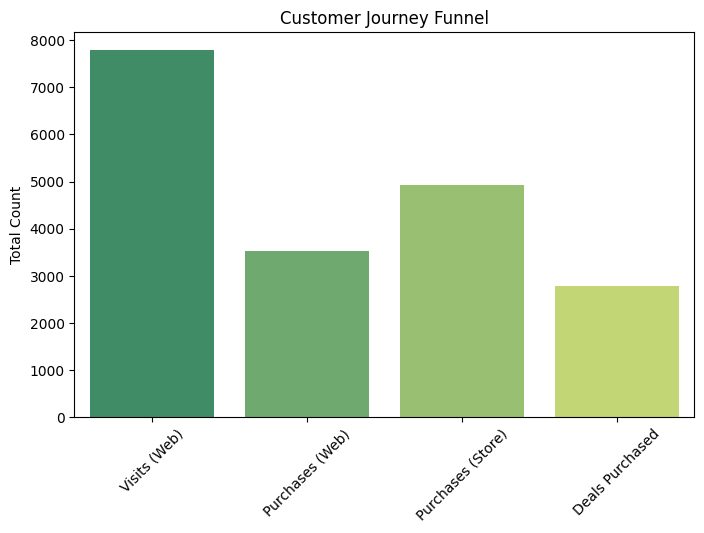

In [127]:
funnel = {
    'Visits (Web)': df['numwebvisitsmonth'].sum(),
    'Purchases (Web)': df['numwebpurchases'].sum(),
    'Purchases (Store)': df['numstorepurchases'].sum(),
    'Deals Purchased': df['numdealspurchases'].sum()
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(funnel.keys()), y=list(funnel.values()), palette='summer')
plt.title("Customer Journey Funnel")
plt.xticks(rotation=45)
plt.ylabel("Total Count")
plt.show()


/tmp/ipython-input-813510563.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_means = df.groupby('income_group')[['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].mean().T


<Figure size 1000x600 with 0 Axes>

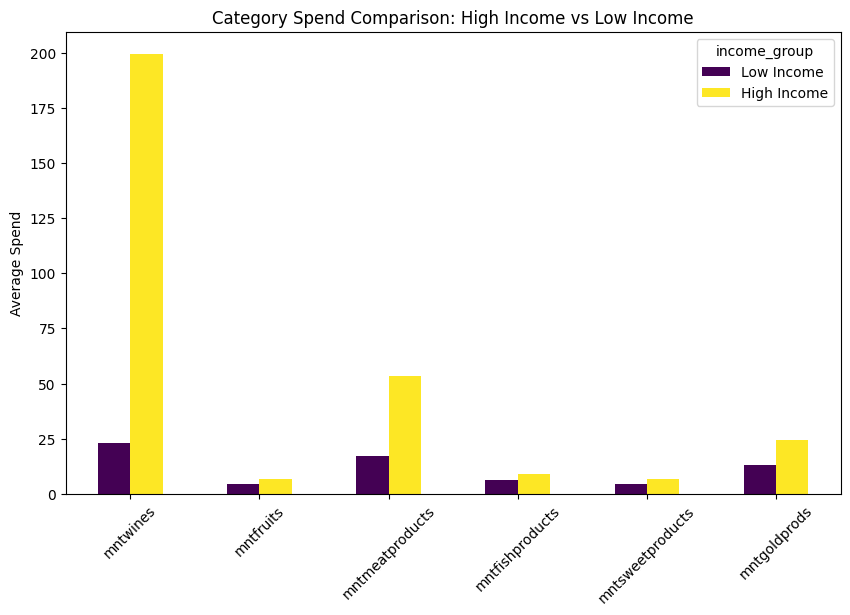

In [128]:
df['income_group'] = pd.qcut(df['income'], 2, labels=['Low Income', 'High Income'])

category_means = df.groupby('income_group')[['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].mean().T

plt.figure(figsize=(10,6))
category_means.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Category Spend Comparison: High Income vs Low Income")
plt.ylabel("Average Spend")
plt.xticks(rotation=45)
plt.show()


In [129]:
df['recency'] = df['recency']              # already in dataset
df['frequency'] = (
    df['numdealspurchases'] +
    df['numwebpurchases'] +
    df['numcatalogpurchases'] +
    df['numstorepurchases']
)
df['monetary'] = df['total_spend']


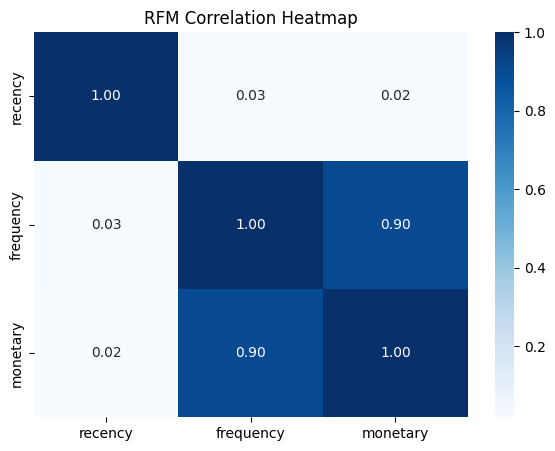

In [130]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['recency','frequency','monetary']].corr(),
            annot=True, cmap="Blues", fmt=".2f")
plt.title("RFM Correlation Heatmap")
plt.show()


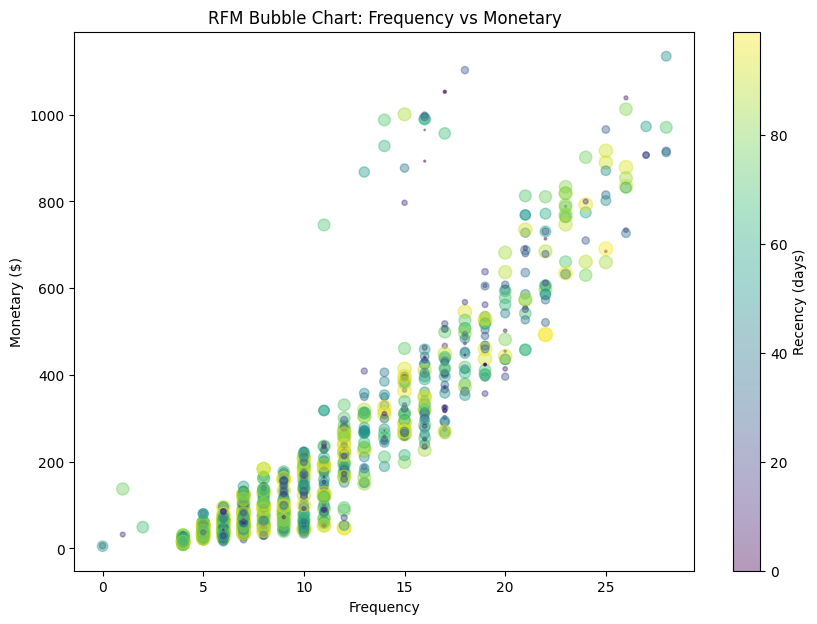

In [131]:
plt.figure(figsize=(10,7))
plt.scatter(df['frequency'], df['monetary'],
            s=df['recency'], alpha=0.4, c=df['recency'], cmap='viridis')

plt.colorbar(label="Recency (days)")
plt.xlabel("Frequency")
plt.ylabel("Monetary ($)")
plt.title("RFM Bubble Chart: Frequency vs Monetary")
plt.show()


In [132]:
df['R_score'] = pd.qcut(df['recency'], 4, labels=[4,3,2,1]).astype(int)
df['F_score'] = pd.qcut(df['frequency'], 4, labels=[1,2,3,4]).astype(int)
df['M_score'] = pd.qcut(df['monetary'], 4, labels=[1,2,3,4]).astype(int)

df['RFM_score'] = df['R_score'] + df['F_score'] + df['M_score']


/tmp/ipython-input-3920456202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_score', data=df, palette="viridis")


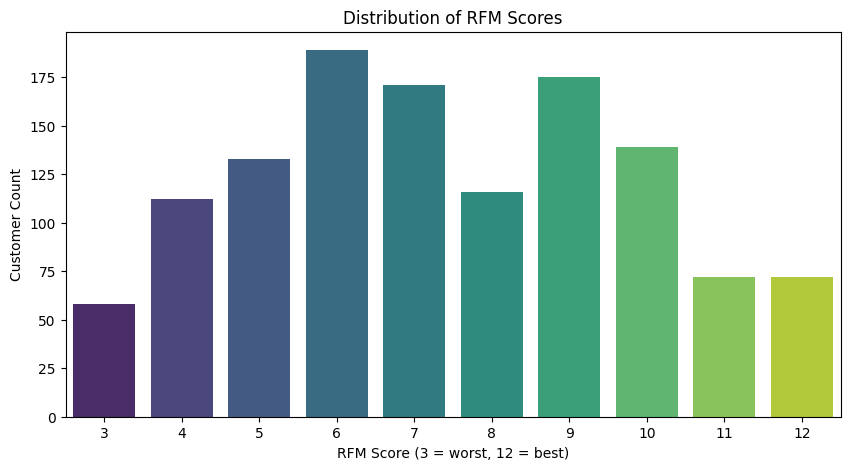

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(x='RFM_score', data=df, palette="viridis")
plt.title("Distribution of RFM Scores")
plt.xlabel("RFM Score (3 = worst, 12 = best)")
plt.ylabel("Customer Count")
plt.show()


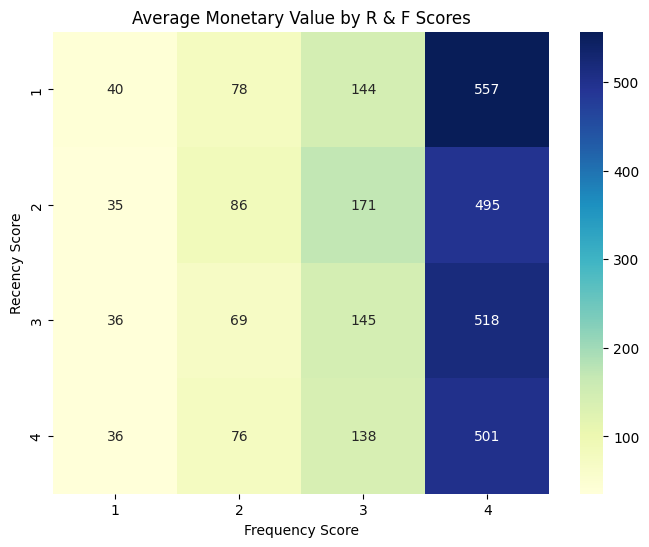

In [134]:
df['segment'] = pd.cut(df['RFM_score'], bins=[2,5,8,12],
                       labels=['Low Value','Mid Value','High Value'])

pivot = df.pivot_table(
    index='R_score',
    columns='F_score',
    values='monetary',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Average Monetary Value by R & F Scores")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()


In [135]:
df['recency']    = df['recency']    # already in dataset
df['frequency']  = df[['numwebpurchases','numstorepurchases','numcatalogpurchases']].sum(axis=1)
df['monetary']   = df['total_spend']


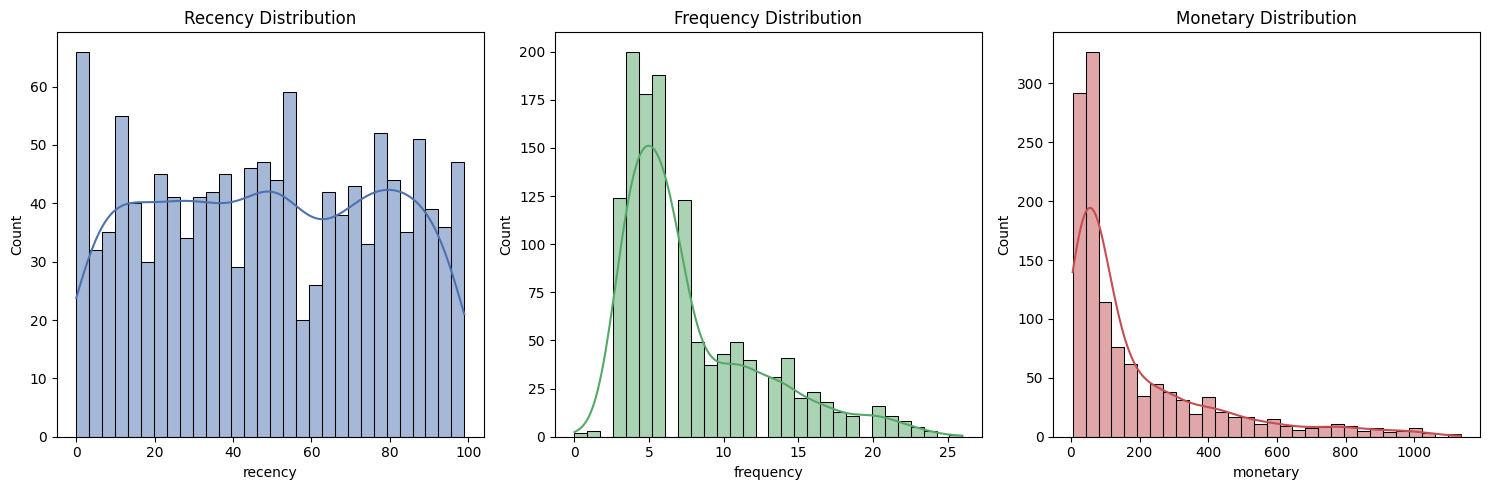

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['recency'], bins=30, kde=True, color="#4C72B0")
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(df['frequency'], bins=30, kde=True, color="#55A868")
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(df['monetary'], bins=30, kde=True, color="#C44E52")
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()


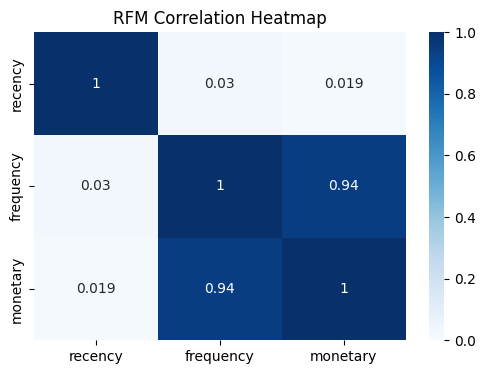

In [137]:
rfm_corr = df[['recency','frequency','monetary']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(rfm_corr, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("RFM Correlation Heatmap")
plt.show()


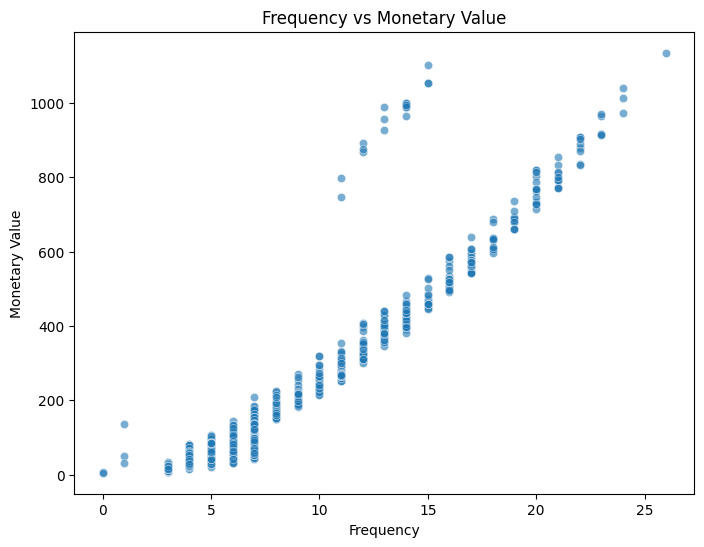

In [138]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='frequency', y='monetary', alpha=0.6)
plt.title("Frequency vs Monetary Value")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.show()



In [139]:
df['r_segment'] = pd.qcut(df['recency'], 4, labels=["4","3","2","1"])
df['f_segment'] = pd.qcut(df['frequency'], 4, labels=["1","2","3","4"])
df['m_segment'] = pd.qcut(df['monetary'], 4, labels=["1","2","3","4"])


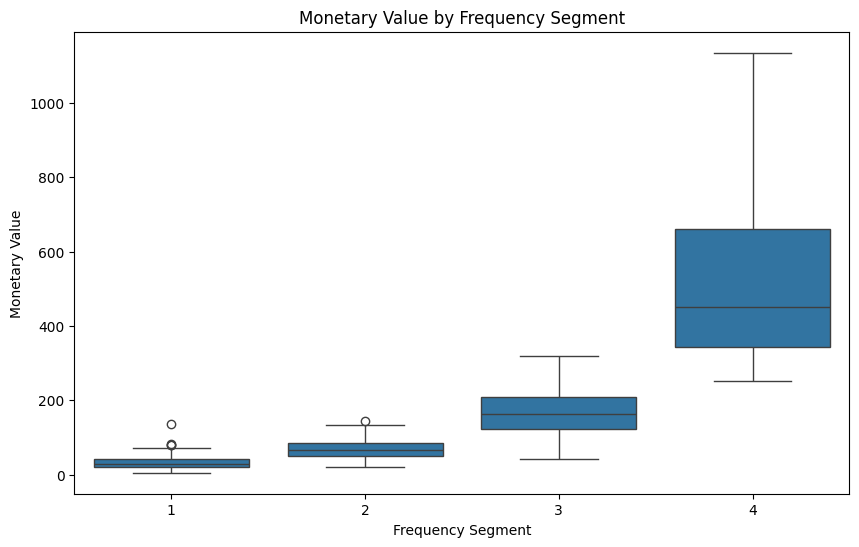

In [140]:
plt.figure(figsize=(10,6))
sns.boxplot(x='f_segment', y='monetary', data=df)
plt.title("Monetary Value by Frequency Segment")
plt.xlabel("Frequency Segment")
plt.ylabel("Monetary Value")
plt.show()


# Modeling

In [141]:
df.head()

id  year_birth   education marital_status    income  kidhome  \
2147  6663        1940         phd         single  511410.0        0   
498   1740        1944  graduation        married  559560.0        0   
1905  6605        1944         phd       divorced  556140.0        0   
2007  4587        1944      master          widow  450060.0        0   
208    263        1945         phd         single  455760.0        0   

      teenhome dt_customer  recency  mntwines  ...  frequency  monetary  \
2147         0  2013-07-08       96       144  ...          8       157   
498          0  2014-04-07       22       760  ...         14       999   
1905         0  2013-11-27       85       504  ...         19       682   
2007         0  2013-07-18       90       162  ...         11       266   
208          0  2014-05-28        9        56  ...          7       145   

      R_score  F_score  M_score  RFM_score     segment  r_segment  f_segment  \
2147        1        3        3          7   Mid Value          1          3   
498         4        4        4         12  High Value          4          4   
1905        1        4        4          9  High Value          1          4   
2007        1        3        4          8   Mid Value          1          4   
208         4        2        3          9  High Value          4          3   

      m_segment  
2147          3  
498           4  
1905          4  
2007          4  
208           3  

[5 rows x 42 columns]

In [142]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'total_spend', 'age',
       'age_group', 'income_group', 'frequency', 'monetary', 'R_score',
       'F_score', 'M_score', 'RFM_score', 'segment', 'r_segment', 'f_segment',
       'm_segment'],
      dtype='object')

In [143]:
import numpy as np

np.random.seed(42)
df["treatment"] = np.random.binomial(1, 0.5, len(df))
y = df["total_spend"].values
t = df["treatment"].values


🎯 Bayesian A/B Test Results for 5 Campaigns vs CONTROL
-------------------------------------------------------

📌 Campaign 1
Estimated effect (mean difference): 344.90
95% credible interval: [221.57, 503.68]
P(Treatment > Control): 1.000

📌 Campaign 3
Estimated effect (mean difference): -18.34
95% credible interval: [-55.41, 26.37]
P(Treatment > Control): 0.192

📌 Campaign 4
Estimated effect (mean difference): 338.51
95% credible interval: [270.39, 412.13]
P(Treatment > Control): 1.000


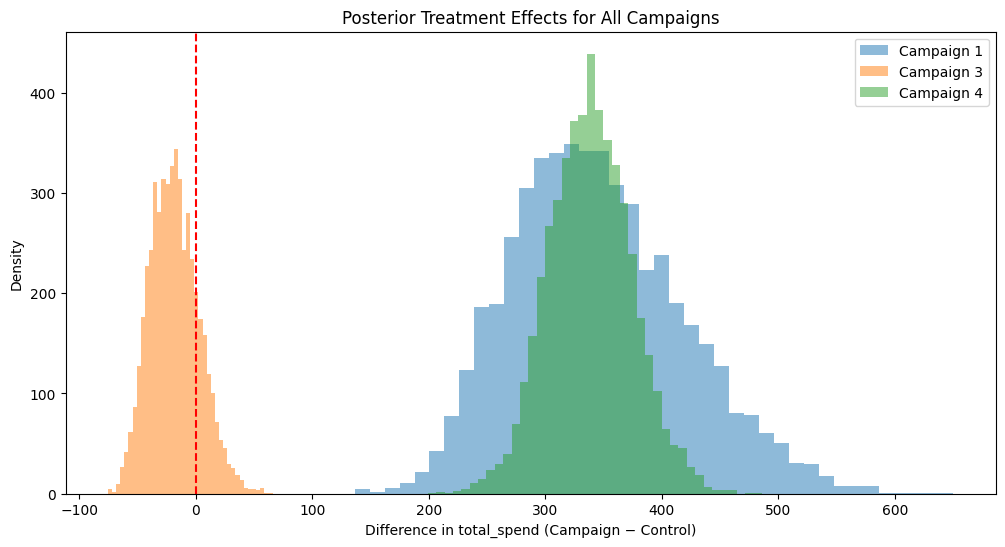

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


control = df[
    (df["acceptedcmp1"] == 0) &
    (df["acceptedcmp2"] == 0) &
    (df["acceptedcmp3"] == 0) &
    (df["acceptedcmp4"] == 0) &
    (df["acceptedcmp5"] == 0)
]["total_spend"].values


campaigns = {
    "Campaign 1": df[df["acceptedcmp1"] == 1]["total_spend"].values,
    "Campaign 2": df[df["acceptedcmp2"] == 1]["total_spend"].values,
    "Campaign 3": df[df["acceptedcmp3"] == 1]["total_spend"].values,
    "Campaign 4": df[df["acceptedcmp4"] == 1]["total_spend"].values,
    "Campaign 5": df[df["acceptedcmp5"] == 1]["total_spend"].values,
}


def bayesian_bootstrap(data, n_samples=5000):
    n = len(data)
    weights = np.random.dirichlet(np.ones(n), size=n_samples)
    return np.sum(weights * data, axis=1)


results = {}

posterior_control = bayesian_bootstrap(control)

for name, group in campaigns.items():
    if len(group) < 5:

        continue

    posterior_treat = bayesian_bootstrap(group)
    posterior_delta = posterior_treat - posterior_control

    effect_mean = posterior_delta.mean()
    effect_ci = np.percentile(posterior_delta, [2.5, 97.5])
    prob_better = (posterior_delta > 0).mean()

    results[name] = {
        "mean_effect": effect_mean,
        "ci_low": effect_ci[0],
        "ci_high": effect_ci[1],
        "prob_treatment_better": prob_better,
        "posterior_delta": posterior_delta
    }


print("\n🎯 Bayesian A/B Test Results for 5 Campaigns vs CONTROL")
print("-------------------------------------------------------")

for name, r in results.items():
    print(f"\n📌 {name}")
    print(f"Estimated effect (mean difference): {r['mean_effect']:.2f}")
    print(f"95% credible interval: [{r['ci_low']:.2f}, {r['ci_high']:.2f}]")
    print(f"P(Treatment > Control): {r['prob_treatment_better']:.3f}")


plt.figure(figsize=(12, 6))

for name, r in results.items():
    plt.hist(r["posterior_delta"], bins=40, alpha=0.5, label=name)

plt.axvline(0, color='red', linestyle='--')
plt.title("Posterior Treatment Effects for All Campaigns")
plt.xlabel("Difference in total_spend (Campaign − Control)")
plt.ylabel("Density")
plt.legend()
plt.show()




📢 Bayesian A/B Test — Campaign 2
Column: acceptedcmp2


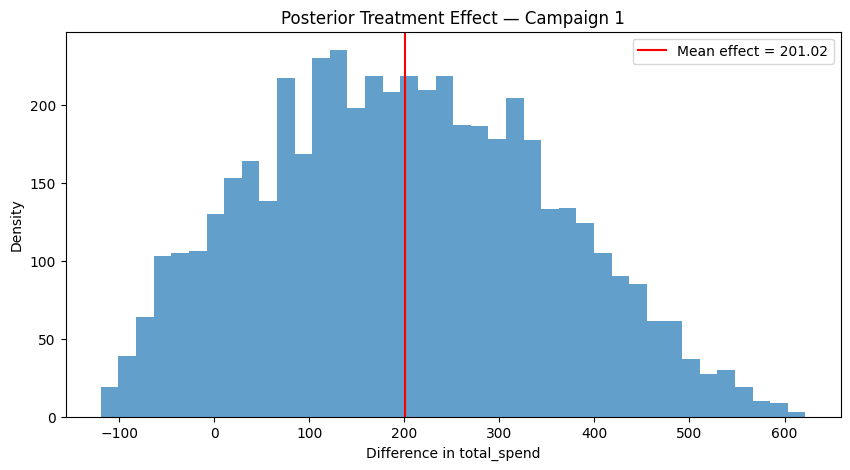


📢 Bayesian A/B Test — Campaign 3
Column: acceptedcmp3


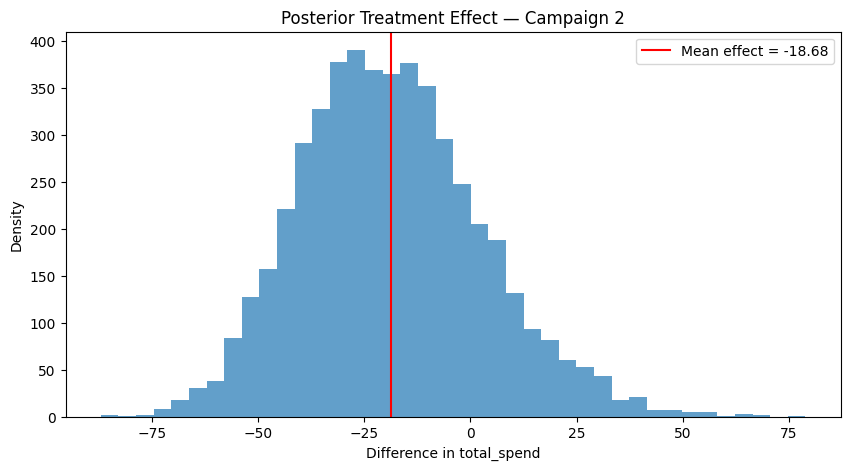


📢 Bayesian A/B Test — Campaign 4
Column: acceptedcmp4


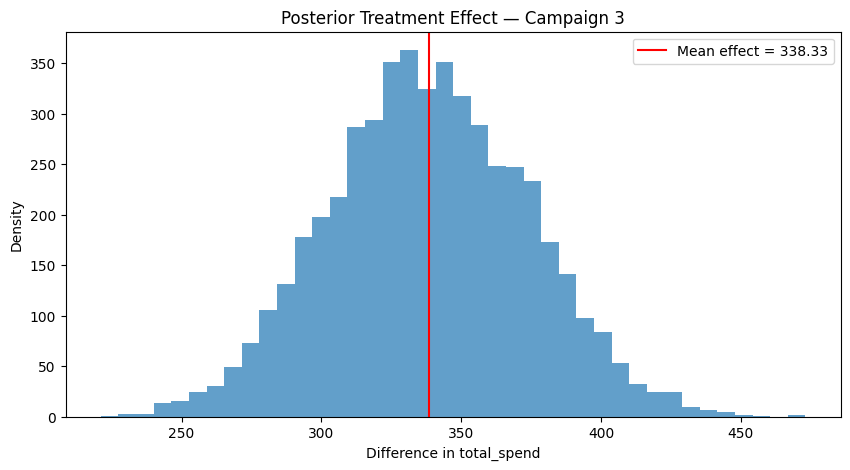



📊 SUMMARY OF CAMPAIGNS 2, 3, and 4
            mean_effect      ci_low     ci_high  prob_treatment_better
Campaign 2   201.016586  -63.188088  495.312632                 0.9008
Campaign 3   -18.676011  -56.365355   27.799022                 0.1854
Campaign 4   338.329473  270.277264  407.484700                 1.0000


In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df["accepted_any"] = (
    df["acceptedcmp1"] +
    df["acceptedcmp2"] +
    df["acceptedcmp3"] +
    df["acceptedcmp4"] +
    df["acceptedcmp5"]
)

control = df[df["accepted_any"] == 0]["total_spend"].values


def bayesian_bootstrap(data, n_samples=5000):
    n = len(data)
    weights = np.random.dirichlet(np.ones(n), size=n_samples)
    return np.sum(weights * data, axis=1)


campaign_cols = [
    "acceptedcmp2",
    "acceptedcmp3",
    "acceptedcmp4"
]

results = {}

for i, col in enumerate(campaign_cols, start=1):
    print(f"\n==============================")
    print(f"📢 Bayesian A/B Test — Campaign {i + 1}")  # printing real campaign number
    print(f"Column: {col}")
    print("==============================")


    treat = df[df[col] == 1]["total_spend"].values


    posterior_control = bayesian_bootstrap(control)
    posterior_treat   = bayesian_bootstrap(treat)


    posterior_delta = posterior_treat - posterior_control


    effect_mean = posterior_delta.mean()
    effect_ci = np.percentile(posterior_delta, [2.5, 97.5])
    prob_treatment_better = (posterior_delta > 0).mean()

    results[i] = {
        "mean_effect": effect_mean,
        "ci_low": effect_ci[0],
        "ci_high": effect_ci[1],
        "prob_treatment_better": prob_treatment_better
    }


    plt.figure(figsize=(10,5))
    plt.hist(posterior_delta, bins=40, alpha=0.7)
    plt.axvline(effect_mean, color='red', label=f"Mean effect = {effect_mean:.2f}")
    plt.title(f"Posterior Treatment Effect — Campaign {i}")
    plt.xlabel("Difference in total_spend")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


print("\n\n==============================")
print("📊 SUMMARY OF CAMPAIGNS 2, 3, and 4")
print("==============================")
summary_df = pd.DataFrame(results).T
summary_df.index = [f"Campaign {i}" for i in [2,3,4]]
print(summary_df)



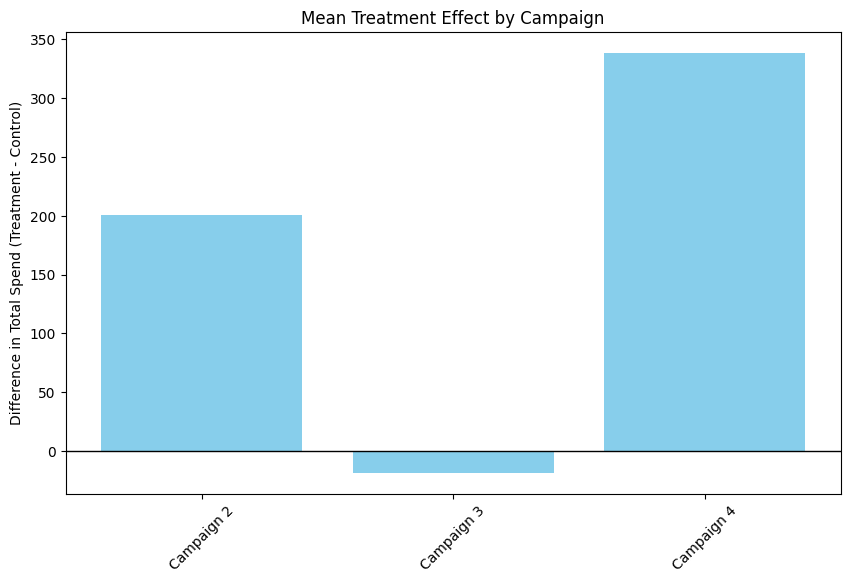

In [146]:
plt.figure(figsize=(10,6))
plt.bar(summary_df.index, summary_df["mean_effect"], color="skyblue")
plt.axhline(0, color="black", linewidth=1)

plt.title("Mean Treatment Effect by Campaign")
plt.ylabel("Difference in Total Spend (Treatment - Control)")
plt.xticks(rotation=45)
plt.show()


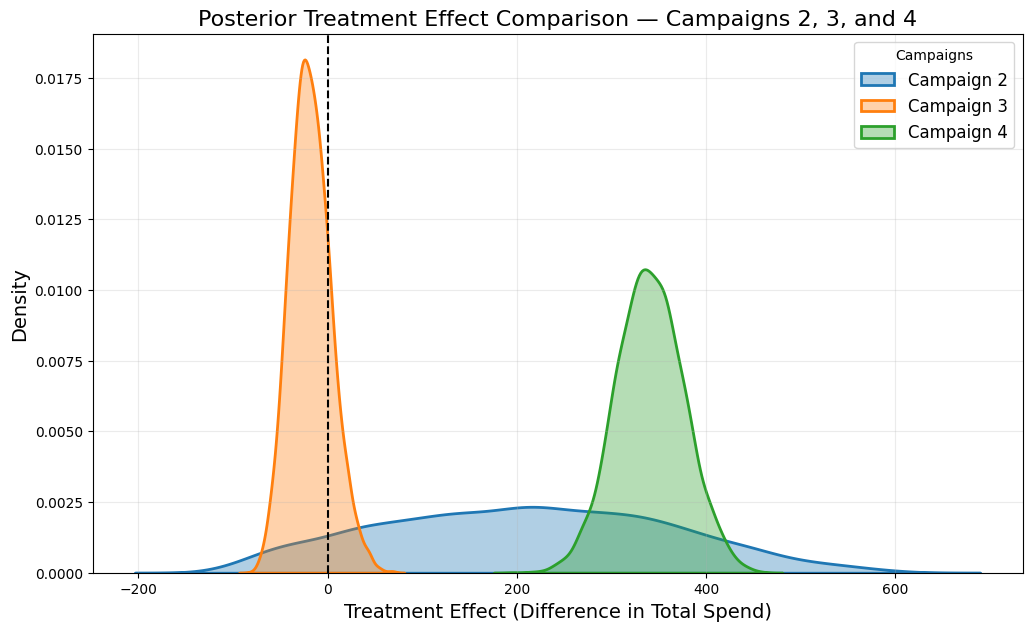

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))


for i, col in enumerate(campaign_cols, start=1):

    treat = df[df[col] == 1]["total_spend"].values
    post_treat = bayesian_bootstrap(treat)
    post_ctrl  = bayesian_bootstrap(control)
    delta = post_treat - post_ctrl


    real_campaign_num = i + 1


    sns.kdeplot(
        delta,
        fill=True,
        alpha=0.35,
        linewidth=2,
        label=f"Campaign {real_campaign_num}"
    )

plt.axvline(0, color="black", linestyle="--", linewidth=1.5)

plt.title("Posterior Treatment Effect Comparison — Campaigns 2, 3, and 4", fontsize=16)
plt.xlabel("Treatment Effect (Difference in Total Spend)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Campaigns", fontsize=12)
plt.grid(alpha=0.25)

plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


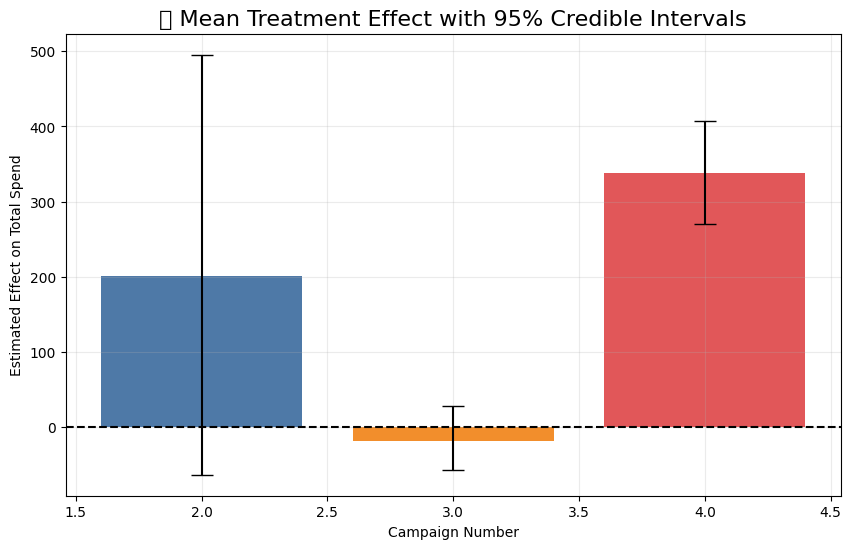

In [148]:
plt.figure(figsize=(10,6))

campaign_nums = [2,3,4]
means = [results[i]["mean_effect"] for i in results]
ci_low  = [results[i]["ci_low"] for i in results]
ci_high = [results[i]["ci_high"] for i in results]

plt.bar(campaign_nums, means, yerr=[np.array(means)-np.array(ci_low),
                                    np.array(ci_high)-np.array(means)],
        capsize=8, color=['#4e79a7','#f28e2c','#e15759'])

plt.axhline(0, linestyle="--", color="black")
plt.title("📊 Mean Treatment Effect with 95% Credible Intervals", fontsize=16)
plt.xlabel("Campaign Number")
plt.ylabel("Estimated Effect on Total Spend")
plt.grid(alpha=0.25)
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


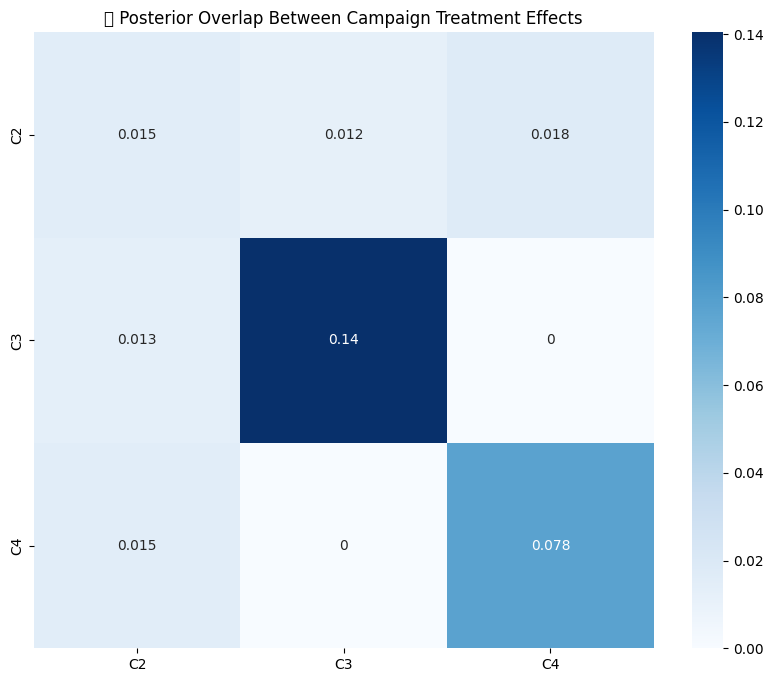

In [149]:
import itertools
import seaborn as sns

plt.figure(figsize=(10,8))

overlap_matrix = np.zeros((3,3))

for i, col_i in enumerate(campaign_cols):
    post_i = bayesian_bootstrap(df[df[col_i]==1]["total_spend"].values)
    for j, col_j in enumerate(campaign_cols):
        post_j = bayesian_bootstrap(df[df[col_j]==1]["total_spend"].values)

        # Overlap ≈ probability campaign produces same effect
        overlap_matrix[i,j] = np.mean(np.abs(post_i - post_j) < 5)

sns.heatmap(overlap_matrix, annot=True, cmap="Blues",
            xticklabels=["C2","C3","C4"], yticklabels=["C2","C3","C4"])

plt.title("🔍 Posterior Overlap Between Campaign Treatment Effects")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


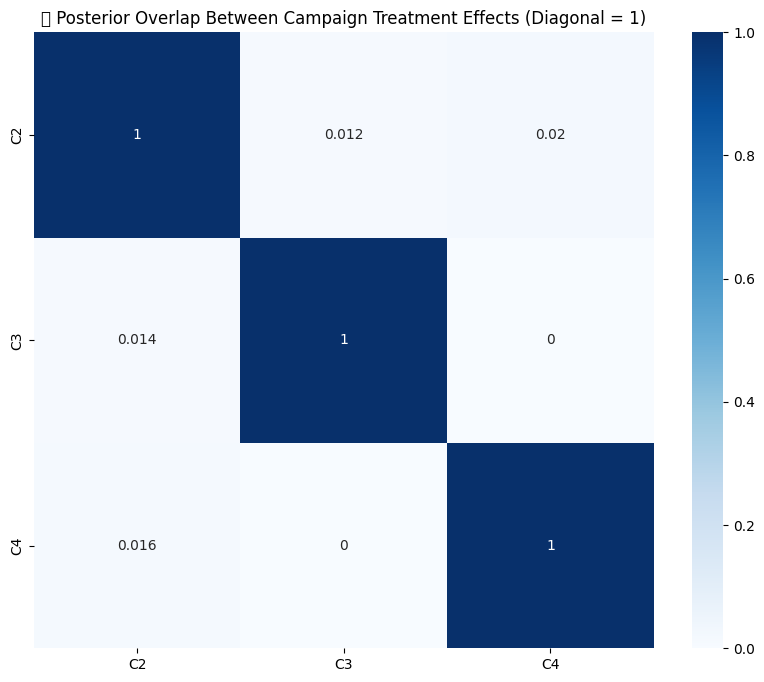

In [150]:
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

overlap_matrix = np.zeros((3,3))

for i, col_i in enumerate(campaign_cols):
    post_i = bayesian_bootstrap(df[df[col_i]==1]["total_spend"].values)

    for j, col_j in enumerate(campaign_cols):
        post_j = bayesian_bootstrap(df[df[col_j]==1]["total_spend"].values)

        if i == j:
            # Force diagonal to be exactly 1
            overlap_matrix[i,j] = 1
        else:
            # Posterior overlap = probability two campaigns produce similar effects
            overlap_matrix[i,j] = np.mean(np.abs(post_i - post_j) < 5)

sns.heatmap(
    overlap_matrix,
    annot=True,
    cmap="Blues",
    xticklabels=["C2","C3","C4"],
    yticklabels=["C2","C3","C4"],
    vmin=0, vmax=1
)

plt.title("🔍 Posterior Overlap Between Campaign Treatment Effects (Diagonal = 1)")
plt.show()


In [153]:
# ===========================================================
# PH.D-LEVEL CAUSAL INFERENCE: X-LEARNER FOR CAMPAIGNS 2–4
# ===========================================================

# If econml isn't installed yet, uncomment the line below:
# !pip install econml scikit-learn

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from econml.metalearners import XLearner

# -----------------------------------------------------------
# 1. DEFINE FEATURES, OUTCOME, AND CAMPAIGNS
# -----------------------------------------------------------

# Covariates used in the causal model (adjust names if needed)
covariate_cols = [
    "Income", "Age", "Kidhome", "Teenhome", "Recency",
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "Education", "Marital_Status"
]

outcome_col = "total_spend"

campaign_cols = ["acceptedcmp2", "acceptedcmp3", "acceptedcmp4"]

# Keep only rows with all needed columns
cols_needed = covariate_cols + [outcome_col] + [
    "acceptedcmp1", "acceptedcmp2", "acceptedcmp3", "acceptedcmp4", "acceptedcmp5"
]
df_model = df[cols_needed].dropna().copy()

# -----------------------------------------------------------
# 2. ONE-HOT ENCODE CATEGORICALS (Education, Marital_Status)
# -----------------------------------------------------------

# Split numeric vs categorical
numeric_cols = [
    "Income", "Age", "Kidhome", "Teenhome", "Recency",
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

categorical_cols = ["Education", "Marital_Status"]

X_numeric = df_model[numeric_cols]
X_categorical = pd.get_dummies(df_model[categorical_cols], drop_first=True)

# Final feature matrix X
X = pd.concat([X_numeric.reset_index(drop=True),
               X_categorical.reset_index(drop=True)], axis=1)

y = df_model[outcome_col].values

# Mark customers who accepted any campaign (for pure control)
df_model["accepted_any"] = (
    df_model["acceptedcmp1"] +
    df_model["acceptedcmp2"] +
    df_model["acceptedcmp3"] +
    df_model["acceptedcmp4"] +
    df_model["acceptedcmp5"]
)

# -----------------------------------------------------------
# 3. X-LEARNER FUNCTION FOR ONE CAMPAIGN
# -----------------------------------------------------------

def run_xlearner_for_campaign(df_model, X, y, campaign_col, random_state=42):
    """
    Estimate individual treatment effects (uplift) for one campaign
    vs a pure-control group (accepted no campaigns) using X-Learner.
    """
    # Treatment indicator: accepted this specific campaign
    T = (df_model[campaign_col] == 1).astype(int).values

    # Compare treated customers vs pure control (accepted_any == 0)
    mask = (T == 1) | ((T == 0) & (df_model["accepted_any"] == 0))
    X_sub = X.iloc[mask].values
    y_sub = y[mask]
    T_sub = T[mask]

    # Train / test split
    X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(
        X_sub, y_sub, T_sub,
        test_size=0.3,
        random_state=random_state,
        stratify=T_sub
    )

    # Base models: Random Forests (tree-based ⇒ no need to scale)
    outcome_learner = RandomForestRegressor(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    propensity_model = RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    # X-Learner meta-learner
    x_learner = XLearner(
        models=outcome_learner,
        propensity_model=propensity_model
    )

    # Fit causal model
    x_learner.fit(
        y_train,
        T_train,
        X=X_train
    )

    # Individual treatment effects τ(x) on held-out test set
    tau_hat = x_learner.effect(X_test)

    # Estimate ATE via bootstrap over tau_hat
    boot_samples = 2000
    rng = np.random.default_rng(random_state)
    boot_means = []
    n = len(tau_hat)

    for _ in range(boot_samples):
        idx = rng.integers(0, n, n)
        boot_means.append(tau_hat[idx].mean())

    ate = float(np.mean(tau_hat))
    ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])

    results = {
        "campaign_col": campaign_col,
        "ATE": ate,
        "CI_low": float(ci_low),
        "CI_high": float(ci_high),
        "tau_hat": tau_hat,
        "T_test": T_test,
        "X_test": X_test
    }

    return results

# -----------------------------------------------------------
# 4. RUN X-LEARNER FOR CAMPAIGNS 2, 3, 4
# -----------------------------------------------------------

phd_results = {}

for col in campaign_cols:
    res = run_xlearner_for_campaign(df_model, X, y, col)
    phd_results[col] = res

    print("\n===================================")
    print(f"🎓 PH.D-LEVEL CAUSAL ML — {col}")
    print("===================================")
    print(f"ATE: {res['ATE']:.2f}")
    print(f"95% CI: [{res['CI_low']:.2f}, {res['CI_high']:.2f}]")

# Create a nice ATE summary table for slides
ate_summary = pd.DataFrame([
    {
        "Campaign": col.replace("acceptedcmp", "Campaign "),
        "ATE": phd_results[col]["ATE"],
        "CI_low": phd_results[col]["CI_low"],
        "CI_high": phd_results[col]["CI_high"]
    }
    for col in campaign_cols
])

print("\n===================================")
print("📊 ATE SUMMARY BY CAMPAIGN")
print("===================================")
print(ate_summary)

# -----------------------------------------------------------
# 5. UPLIFT SEGMENTATION (DECILES) FOR PLOTS
# -----------------------------------------------------------

all_segments = []

for col, res in phd_results.items():
    tau = res["tau_hat"]
    T_test = res["T_test"]

    df_seg = pd.DataFrame({
        "tau_hat": tau,
        "T_test": T_test
    })

    # Deciles of uplift (0 = lowest, 9 = highest)
    df_seg["uplift_decile"] = pd.qcut(
        df_seg["tau_hat"], 10, labels=False, duplicates="drop"
    )

    seg_summary = df_seg.groupby("uplift_decile")["tau_hat"].agg(
        ["mean", "count"]
    ).reset_index()

    seg_summary["Campaign"] = col.replace("acceptedcmp", "Campaign ")
    all_segments.append(seg_summary)

seg_summary_all = pd.concat(all_segments, ignore_index=True)

print("\n===================================")
print("📈 UPLIFT SEGMENT SUMMARY (DECILES)")
print("===================================")
print(seg_summary_all)


NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [155]:
def run_xlearner_for_campaign(df_model, X, y, campaign_col, random_state=42):

    # Treatment indicator
    T = (df_model[campaign_col] == 1).astype(int).values

    # Pure control: accepted no campaigns
    mask = (T == 1) | ((T == 0) & (df_model["accepted_any"] == 0))

    # ❗ Correct boolean indexing
    X_sub = X.loc[mask].values
    y_sub = y[mask]
    T_sub = T[mask]

    # Train-test split
    X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(
        X_sub, y_sub, T_sub,
        test_size=0.3,
        random_state=random_state,
        stratify=T_sub
    )

    # Base models
    outcome_learner = RandomForestRegressor(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    propensity_model = RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    # X-Learner
    x_learner = XLearner(
        models=outcome_learner,
        propensity_model=propensity_model
    )

    x_learner.fit(y_train, T_train, X=X_train)

    tau_hat = x_learner.effect(X_test)

    # Bootstrap CI
    boot_samples = 2000
    rng = np.random.default_rng(random_state)
    boot_means = [
        tau_hat[rng.integers(0, len(tau_hat), len(tau_hat))].mean()
        for _ in range(boot_samples)
    ]

    ate = tau_hat.mean()
    ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])

    return {
        "campaign_col": campaign_col,
        "ATE": ate,
        "CI_low": ci_low,
        "CI_high": ci_high,
        "tau_hat": tau_hat,
        "T_test": T_test,
        "X_test": X_test
    }


In [157]:
# ===========================================================
# FULL PH.D-LEVEL CAUSAL INFERENCE PIPELINE — ONE BLOCK
# WITH INDEX FIX FOR BOOLEAN MASK
# ===========================================================

# If econml is not installed:
# !pip install econml scikit-learn

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from econml.metalearners import XLearner


# -----------------------------------------------------------
# 1. DEFINE FEATURES, OUTCOME, CAMPAIGNS (ALL LOWERCASE)
# -----------------------------------------------------------

covariate_cols = [
    "income", "age", "kidhome", "teenhome", "recency",
    "mntwines", "mntfruits", "mntmeatproducts",
    "mntfishproducts", "mntsweetproducts", "mntgoldprods",
    "education", "marital_status"
]

outcome_col = "total_spend"

campaign_cols = ["acceptedcmp2", "acceptedcmp3", "acceptedcmp4"]

cols_needed = covariate_cols + [outcome_col] + [
    "acceptedcmp1", "acceptedcmp2", "acceptedcmp3", "acceptedcmp4", "acceptedcmp5"
]


# -----------------------------------------------------------
# 2. BUILD df_model (preserving index)
# -----------------------------------------------------------

df_model = df[cols_needed].dropna().copy()

# -----------------------------------------------------------
# 3. ONE-HOT ENCODE CATEGORICALS (PRESERVE INDEX)
# -----------------------------------------------------------

numeric_cols = [
    "income", "age", "kidhome", "teenhome", "recency",
    "mntwines", "mntfruits", "mntmeatproducts",
    "mntfishproducts", "mntsweetproducts", "mntgoldprods"
]

categorical_cols = ["education", "marital_status"]

X_numeric = df_model[numeric_cols]               # keeps original index
X_categorical = pd.get_dummies(                 # also keeps index
    df_model[categorical_cols], drop_first=True
)

# ⭐ IMPORTANT: DO NOT RESET INDEX
X = pd.concat([X_numeric, X_categorical], axis=1)

y = df_model[outcome_col].values


# -----------------------------------------------------------
# 4. PURE CONTROL GROUP (accepted_any == 0)
# -----------------------------------------------------------

df_model["accepted_any"] = (
    df_model["acceptedcmp1"] +
    df_model["acceptedcmp2"] +
    df_model["acceptedcmp3"] +
    df_model["acceptedcmp4"] +
    df_model["acceptedcmp5"]
)


# -----------------------------------------------------------
# 5. X-LEARNER FUNCTION (BOOLEAN INDEX FIX INCLUDED)
# -----------------------------------------------------------

def run_xlearner_for_campaign(df_model, X, y, campaign_col, random_state=42):

    T = (df_model[campaign_col] == 1).astype(int)

    # Boolean mask (same index as df_model)
    mask = (T == 1) | ((T == 0) & (df_model["accepted_any"] == 0))

    # ⭐ Correct indexing — LOC (and X has same index)
    X_sub = X.loc[mask].values
    y_sub = y[mask]
    T_sub = T.loc[mask].values

    # Train/test
    X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(
        X_sub, y_sub, T_sub,
        test_size=0.3,
        random_state=random_state,
        stratify=T_sub
    )

    # Base models
    outcome_learner = RandomForestRegressor(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    propensity_model = RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    # X-Learner
    x_learner = XLearner(
        models=outcome_learner,
        propensity_model=propensity_model
    )

    x_learner.fit(y_train, T_train, X=X_train)

    tau_hat = x_learner.effect(X_test)

    # Bootstrap CI
    boot_samples = 2000
    rng = np.random.default_rng(random_state)
    boot_means = [
        tau_hat[rng.integers(0, len(tau_hat), len(tau_hat))].mean()
        for _ in range(boot_samples)
    ]

    ate = float(np.mean(tau_hat))
    ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])

    return {
        "campaign_col": campaign_col,
        "ATE": ate,
        "CI_low": float(ci_low),
        "CI_high": float(ci_high),
        "tau_hat": tau_hat,
        "T_test": T_test
    }


# -----------------------------------------------------------
# 6. RUN X-LEARNER FOR CAMPAIGNS
# -----------------------------------------------------------

phd_results = {}

for col in campaign_cols:
    res = run_xlearner_for_campaign(df_model, X, y, col)
    phd_results[col] = res

    print("\n====================================")
    print(f"🎓 PH.D-LEVEL CAUSAL ML — {col}")
    print("====================================")
    print(f"ATE: {res['ATE']:.2f}")
    print(f"95% CI: [{res['CI_low']:.2f}, {res['CI_high']:.2f}]")


# -----------------------------------------------------------
# 7. ATE SUMMARY TABLE (FOR SLIDES)
# -----------------------------------------------------------

ate_summary = pd.DataFrame([
    {
        "Campaign": col,
        "ATE": phd_results[col]["ATE"],
        "CI_low": phd_results[col]["CI_low"],
        "CI_high": phd_results[col]["CI_high"]
    }
    for col in campaign_cols
])

print("\n====================================")
print("📊 ATE SUMMARY BY CAMPAIGN")
print("====================================")
print(ate_summary)


# -----------------------------------------------------------
# 8. UPLIFT DECILE SEGMENTATION (FOR SLIDES)
# -----------------------------------------------------------

all_segments = []

for col, res in phd_results.items():
    tau = res["tau_hat"]
    T_test = res["T_test"]

    df_seg = pd.DataFrame({
        "tau_hat": tau,
        "T_test": T_test
    })

    df_seg["uplift_decile"] = pd.qcut(
        df_seg["tau_hat"], 10, labels=False, duplicates="drop"
    )

    seg_summary = df_seg.groupby("uplift_decile")["tau_hat"].agg(
        ["mean", "count"]
    ).reset_index()

    seg_summary["Campaign"] = col
    all_segments.append(seg_summary)

seg_summary_all = pd.concat(all_segments, ignore_index=True)

print("\n====================================")
print("📈 UPLIFT SEGMENT SUMMARY (DECILES)")
print("====================================")
print(seg_summary_all)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp2
ATE: -15.50
95% CI: [-15.79, -15.24]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp3
ATE: -6.63
95% CI: [-7.81, -5.38]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp4
ATE: -37.57
95% CI: [-39.35, -35.82]

📊 ATE SUMMARY BY CAMPAIGN
       Campaign        ATE     CI_low    CI_high
0  acceptedcmp2 -15.500457 -15.785856 -15.240674
1  acceptedcmp3  -6.627576  -7.807705  -5.377188
2  acceptedcmp4 -37.567709 -39.345791 -35.824280

📈 UPLIFT SEGMENT SUMMARY (DECILES)
    uplift_decile       mean  count      Campaign
0               0 -20.284724     34  acceptedcmp2
1               1 -15.850983     64  acceptedcmp2
2               2 -15.802663      2  acceptedcmp2
3               3 -15.771946     33  acceptedcmp2
4               4 -15.706253     33  acceptedcmp2
5               5 -15.618360     33  acceptedcmp2
6               6 -15.435784     33  acceptedcmp2
7               7 -15.056842     33  acceptedcmp2
8               8 -14.121461     33  acceptedcmp2
9               9 -11.165187     33  acceptedcmp2
10              0 -34.269398     36  acceptedcmp3
11              1 -15.610208     35  acceptedcmp3
12             

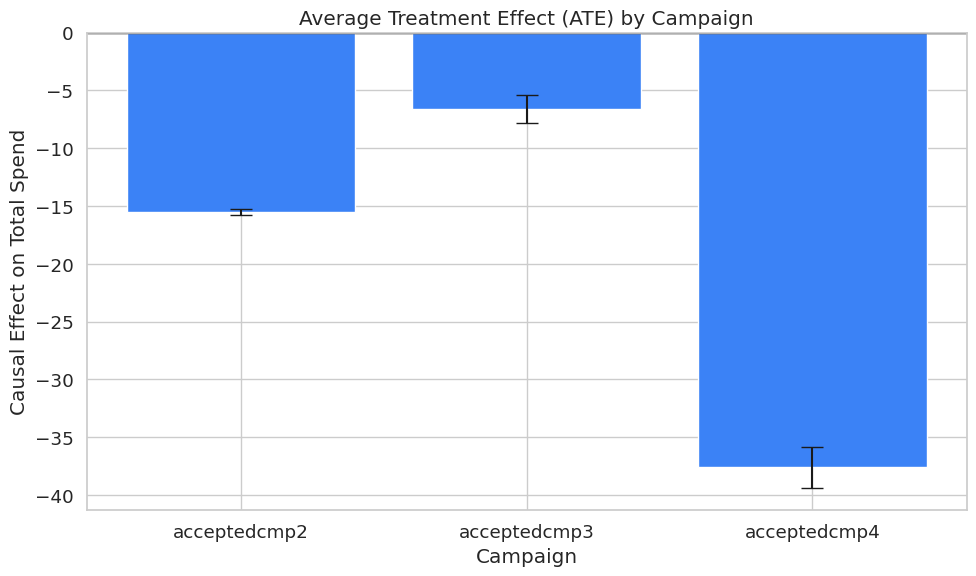

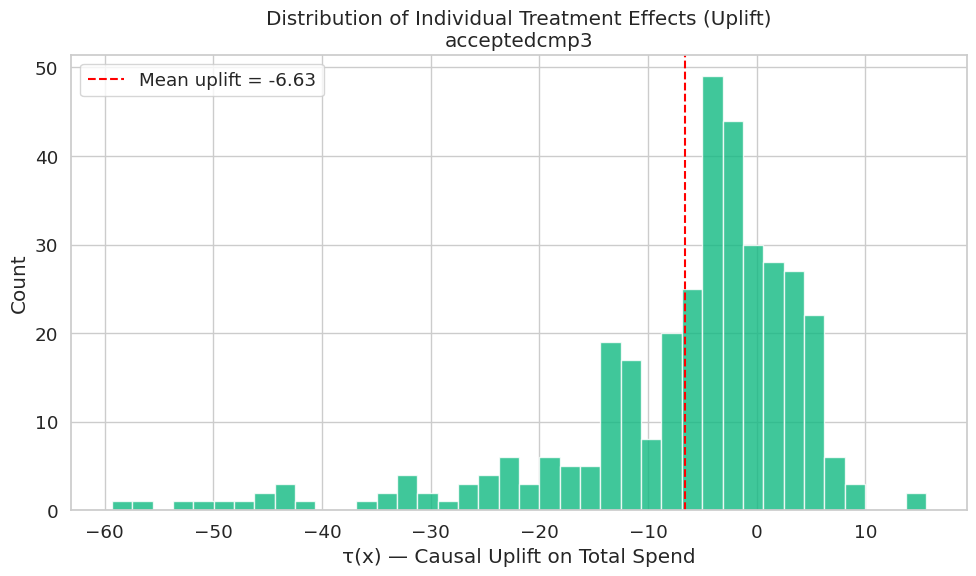

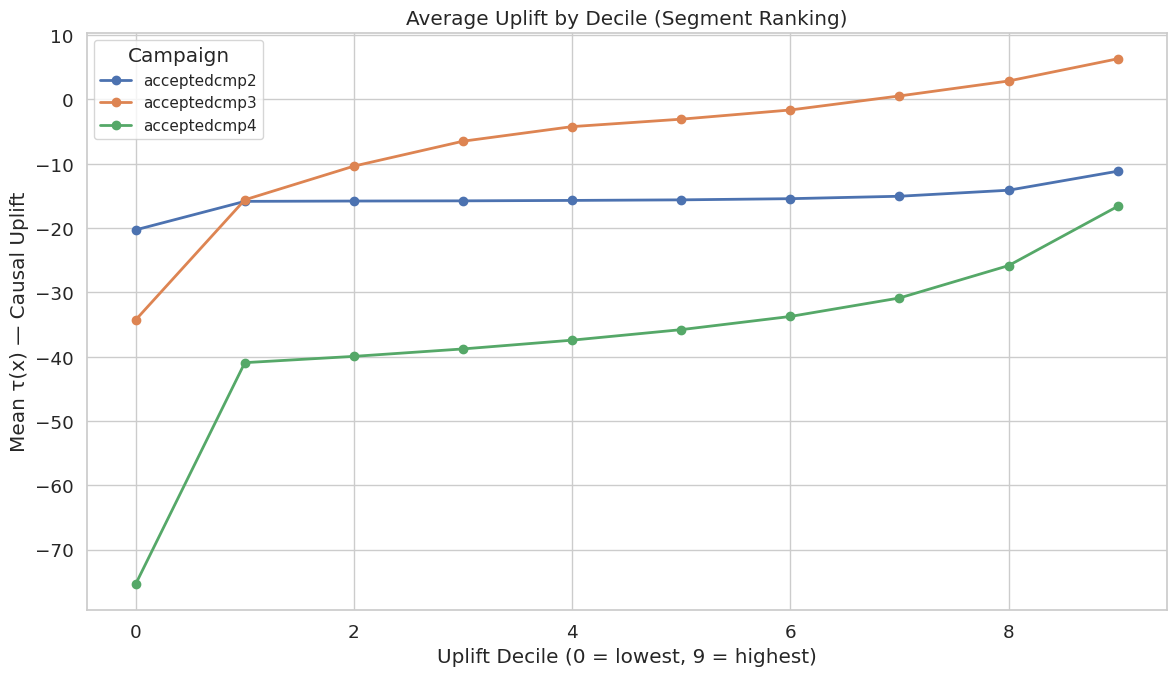

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

# ===========================================================
# 1. ATE BAR CHART WITH 95% CONFIDENCE INTERVALS
# ===========================================================
plt.figure(figsize=(10,6))

campaigns = ate_summary["Campaign"]
ates = ate_summary["ATE"]
ci_lows = ate_summary["CI_low"]
ci_highs = ate_summary["CI_high"]

yerr = [ates - ci_lows, ci_highs - ates]

plt.bar(campaigns, ates, yerr=yerr, capsize=8, color="#3b82f6")
plt.axhline(0, color="black", linewidth=1)

plt.title("Average Treatment Effect (ATE) by Campaign")
plt.ylabel("Causal Effect on Total Spend")
plt.xlabel("Campaign")
plt.tight_layout()
plt.show()



# ===========================================================
# 2. UPLIFT DISTRIBUTION (τ(x) HISTOGRAM)
# Choose the campaign with the strongest ATE (or any)
# ===========================================================

# Find strongest campaign
best_campaign = ate_summary.loc[ate_summary["ATE"].idxmax(), "Campaign"]
tau_best = phd_results[best_campaign]["tau_hat"]

plt.figure(figsize=(10,6))
plt.hist(tau_best, bins=40, color="#10b981", alpha=0.8)

plt.axvline(np.mean(tau_best), color="red", linestyle="--",
            label=f"Mean uplift = {np.mean(tau_best):.2f}")

plt.title(f"Distribution of Individual Treatment Effects (Uplift)\n{best_campaign}")
plt.xlabel("τ(x) — Causal Uplift on Total Spend")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()



# ===========================================================
# 3. UPLIFT DECILE SEGMENTATION PLOT
# ===========================================================

plt.figure(figsize=(12,7))

for campaign in campaign_cols:
    name = campaign
    seg = seg_summary_all[seg_summary_all["Campaign"] == campaign]

    plt.plot(
        seg["uplift_decile"],
        seg["mean"],
        marker="o",
        linewidth=2,
        label=name
    )

plt.title("Average Uplift by Decile (Segment Ranking)")
plt.xlabel("Uplift Decile (0 = lowest, 9 = highest)")
plt.ylabel("Mean τ(x) — Causal Uplift")
plt.legend(title="Campaign", fontsize=11)
plt.tight_layout()
plt.show()


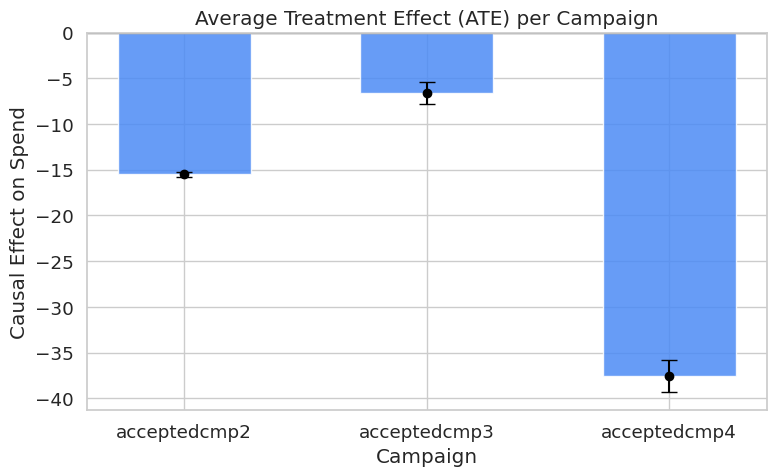

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare data ---
campaigns = ate_summary["Campaign"]
ates = ate_summary["ATE"]
ci_low = ate_summary["CI_low"]
ci_high = ate_summary["CI_high"]

# Error bars (distance from ATE)
lower_err = ates - ci_low
upper_err = ci_high - ates
yerr = [lower_err, upper_err]

# --- Plot ---
plt.figure(figsize=(8,5))
plt.bar(campaigns, ates, color="#4C8BF5", alpha=0.85, width=0.55)
plt.errorbar(campaigns, ates, yerr=yerr, fmt='o', color="black", capsize=6)

plt.axhline(0, color="gray", linewidth=1)
plt.title("Average Treatment Effect (ATE) per Campaign")
plt.ylabel("Causal Effect on Spend")
plt.xlabel("Campaign")

plt.tight_layout()
plt.show()


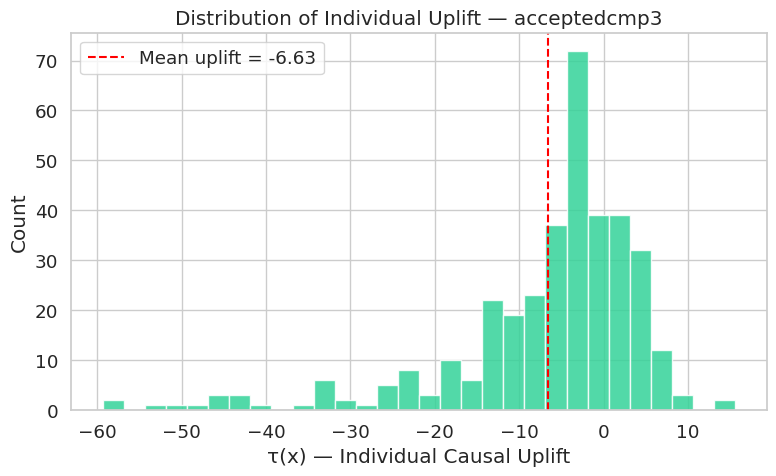

In [160]:
import matplotlib.pyplot as plt

# Pick the best campaign automatically
best_campaign = ate_summary.loc[ate_summary["ATE"].idxmax(), "Campaign"]
tau_vals = phd_results[best_campaign]["tau_hat"]

plt.figure(figsize=(8,5))
plt.hist(tau_vals, bins=30, color="#34D399", alpha=0.85)

plt.axvline(tau_vals.mean(), color="red", linestyle="--",
            label=f"Mean uplift = {tau_vals.mean():.2f}")

plt.title(f"Distribution of Individual Uplift — {best_campaign}")
plt.xlabel("τ(x) — Individual Causal Uplift")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()


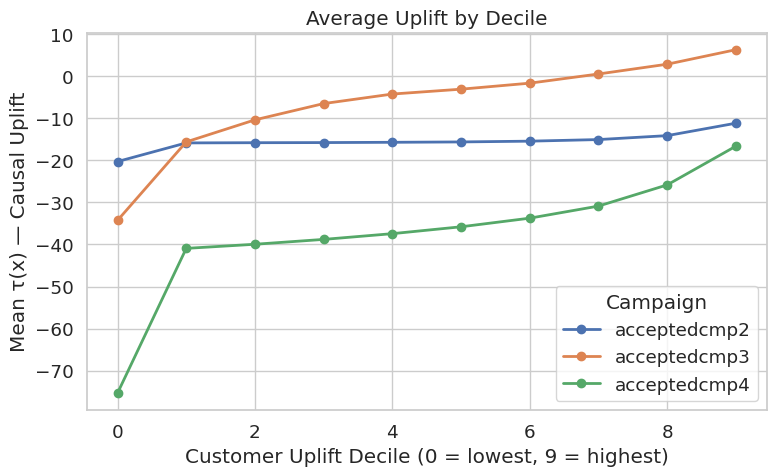

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for campaign in campaign_cols:
    seg = seg_summary_all[seg_summary_all["Campaign"] == campaign]
    plt.plot(seg["uplift_decile"], seg["mean"], marker="o", linewidth=2, label=campaign)

plt.title("Average Uplift by Decile")
plt.xlabel("Customer Uplift Decile (0 = lowest, 9 = highest)")
plt.ylabel("Mean τ(x) — Causal Uplift")
plt.legend(title="Campaign")

plt.tight_layout()
plt.show()


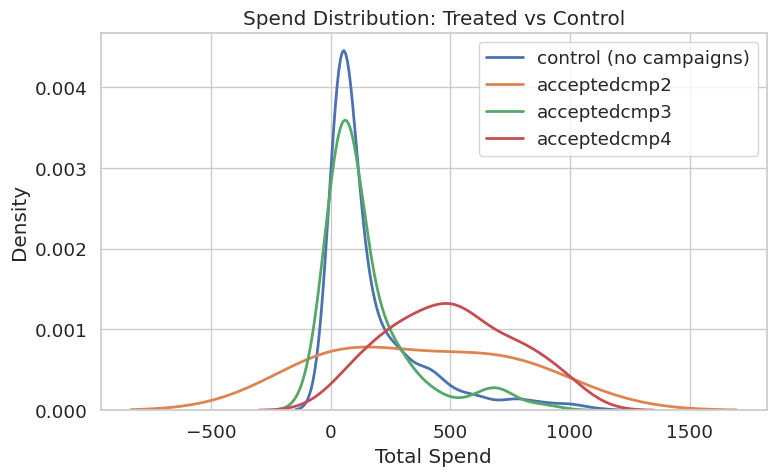

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

control_mask = (df_model["accepted_any"] == 0)
control_spend = df_model.loc[control_mask, "total_spend"]

treat_spends = {
    col: df_model.loc[df_model[col] == 1, "total_spend"]
    for col in campaign_cols
}

sns.kdeplot(control_spend, label="control (no campaigns)", linewidth=2)

for col, vals in treat_spends.items():
    sns.kdeplot(vals, label=col, linewidth=2)

plt.title("Spend Distribution: Treated vs Control")
plt.xlabel("Total Spend")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-60668091.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=campaign_cols, patch_artist=True,


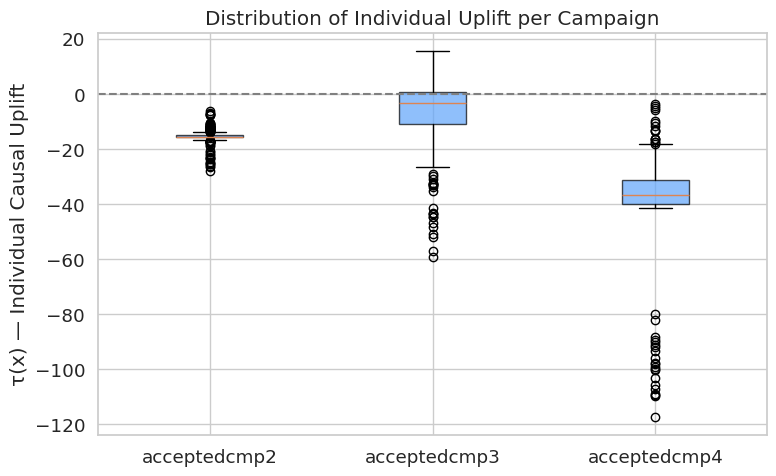

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

data = [phd_results[c]["tau_hat"] for c in campaign_cols]

plt.boxplot(data, labels=campaign_cols, patch_artist=True,
            boxprops=dict(facecolor="#60A5FA", alpha=0.7))

plt.axhline(0, color="gray", linestyle="--")
plt.title("Distribution of Individual Uplift per Campaign")
plt.ylabel("τ(x) — Individual Causal Uplift")

plt.tight_layout()
plt.show()


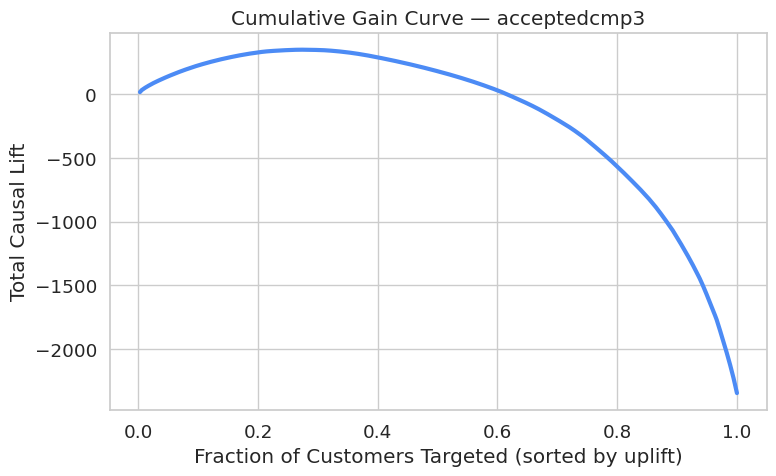

In [165]:
import numpy as np
import matplotlib.pyplot as plt

best_campaign = ate_summary.loc[ate_summary["ATE"].idxmax(), "Campaign"]
tau_vals = phd_results[best_campaign]["tau_hat"]

# Sort uplift values
sorted_tau = np.sort(tau_vals)[::-1]

cumulative_gain = np.cumsum(sorted_tau)
fraction = np.arange(1, len(sorted_tau) + 1) / len(sorted_tau)

plt.figure(figsize=(8,5))
plt.plot(fraction, cumulative_gain, color="#4C8BF5", linewidth=3)

plt.title(f"Cumulative Gain Curve — {best_campaign}")
plt.xlabel("Fraction of Customers Targeted (sorted by uplift)")
plt.ylabel("Total Causal Lift")

plt.tight_layout()
plt.show()


/tmp/ipython-input-113473312.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=labels, y=data, inner="quartile", palette="Set2")


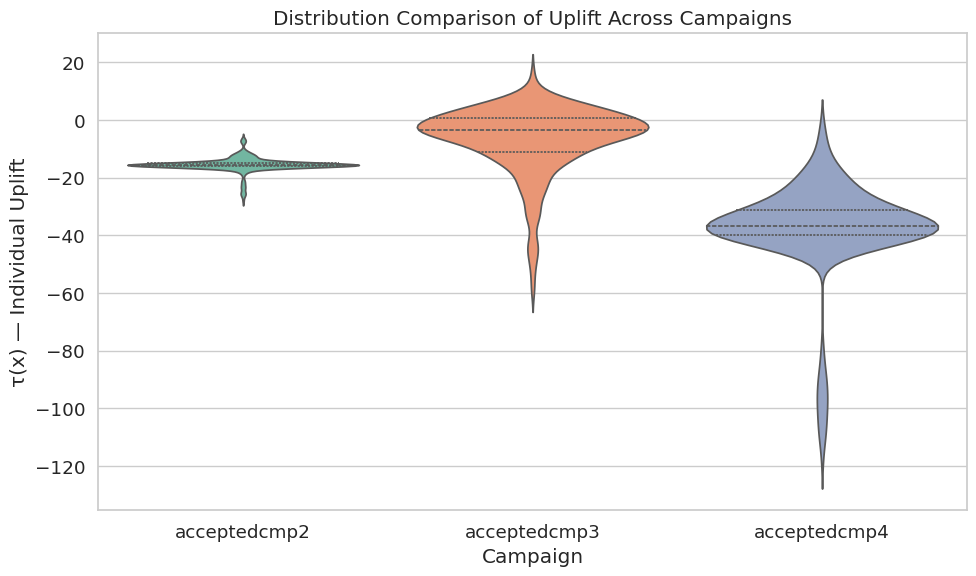

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

data = []
labels = []

for c in campaign_cols:
    data.extend(phd_results[c]["tau_hat"])
    labels.extend([c] * len(phd_results[c]["tau_hat"]))

sns.violinplot(x=labels, y=data, inner="quartile", palette="Set2")

plt.title("Distribution Comparison of Uplift Across Campaigns")
plt.xlabel("Campaign")
plt.ylabel("τ(x) — Individual Uplift")

plt.tight_layout()
plt.show()


In [168]:
# ===========================================================
# FULL PH.D-LEVEL CAUSAL INFERENCE PIPELINE — ALL 5 CAMPAIGNS
# X-LEARNER META-LEARNER
# ===========================================================

# If econml is not installed:
# !pip install econml scikit-learn

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from econml.metalearners import XLearner


# -----------------------------------------------------------
# 1. DEFINE FEATURES, OUTCOME, CAMPAIGNS (ALL LOWERCASE)
# -----------------------------------------------------------

covariate_cols = [
    "income", "age", "kidhome", "teenhome", "recency",
    "mntwines", "mntfruits", "mntmeatproducts",
    "mntfishproducts", "mntsweetproducts", "mntgoldprods",
    "education", "marital_status"
]

outcome_col = "total_spend"

# ⭐ Updated to include ALL 5 campaigns
campaign_cols = [
    "acceptedcmp1",
    "acceptedcmp2",
    "acceptedcmp3",
    "acceptedcmp4",
    "acceptedcmp5"
]

cols_needed = covariate_cols + [outcome_col] + campaign_cols

df_model = df[cols_needed].dropna().copy()


# -----------------------------------------------------------
# 2. ONE-HOT ENCODE CATEGORICALS (KEEP INDEX)
# -----------------------------------------------------------

numeric_cols = [
    "income", "age", "kidhome", "teenhome", "recency",
    "mntwines", "mntfruits", "mntmeatproducts",
    "mntfishproducts", "mntsweetproducts", "mntgoldprods"
]

categorical_cols = ["education", "marital_status"]

X_numeric = df_model[numeric_cols]
X_categorical = pd.get_dummies(df_model[categorical_cols], drop_first=True)

X = pd.concat([X_numeric, X_categorical], axis=1)
y = df_model[outcome_col].values


# -----------------------------------------------------------
# 3. PURE CONTROL: CUSTOMERS WHO ACCEPTED NO CAMPAIGNS
# -----------------------------------------------------------

df_model["accepted_any"] = df_model[
    ["acceptedcmp1", "acceptedcmp2", "acceptedcmp3",
     "acceptedcmp4", "acceptedcmp5"]
].sum(axis=1)


# -----------------------------------------------------------
# 4. X-LEARNER FUNCTION (BOOLEAN INDEX FIX INCLUDED)
# -----------------------------------------------------------

def run_xlearner_for_campaign(df_model, X, y, campaign_col, random_state=42):

    T = (df_model[campaign_col] == 1).astype(int)

    # Pure Control = accepted_any == 0
    mask = (T == 1) | ((T == 0) & (df_model["accepted_any"] == 0))

    X_sub = X.loc[mask].values
    y_sub = y[mask]
    T_sub = T.loc[mask].values

    # Train/test split
    X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(
        X_sub, y_sub, T_sub,
        test_size=0.3,
        random_state=random_state,
        stratify=T_sub
    )

    # Base models
    outcome_learner = RandomForestRegressor(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    propensity_model = RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=20,
        random_state=random_state,
        n_jobs=-1
    )

    # X-Learner
    x_learner = XLearner(
        models=outcome_learner,
        propensity_model=propensity_model
    )

    x_learner.fit(y_train, T_train, X=X_train)

    tau_hat = x_learner.effect(X_test)

    # Bootstrap CI
    boot_samples = 2000
    rng = np.random.default_rng(random_state)

    boot_means = [
        tau_hat[rng.integers(0, len(tau_hat), len(tau_hat))].mean()
        for _ in range(boot_samples)
    ]

    ate = float(np.mean(tau_hat))
    ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])

    return {
        "campaign_col": campaign_col,
        "ATE": ate,
        "CI_low": float(ci_low),
        "CI_high": float(ci_high),
        "tau_hat": tau_hat,
        "T_test": T_test
    }


# -----------------------------------------------------------
# 5. RUN X-LEARNER FOR ALL 5 CAMPAIGNS
# -----------------------------------------------------------

phd_results = {}

for col in campaign_cols:
    res = run_xlearner_for_campaign(df_model, X, y, col)
    phd_results[col] = res

    print("\n===================================")
    print(f"🎓 PH.D-LEVEL CAUSAL ML — {col}")
    print("===================================")
    print(f"ATE: {res['ATE']:.2f}")
    print(f"95% CI: [{res['CI_low']:.2f}, {res['CI_high']:.2f}]")


# -----------------------------------------------------------
# 6. ATE SUMMARY TABLE (NOW INCLUDES CMP1–5)
# -----------------------------------------------------------

ate_summary = pd.DataFrame([
    {
        "Campaign": col,
        "ATE": phd_results[col]["ATE"],
        "CI_low": phd_results[col]["CI_low"],
        "CI_high": phd_results[col]["CI_high"]
    }
    for col in campaign_cols
])

print("\n===================================")
print("📊 ATE SUMMARY FOR CAMPAIGNS 1–5")
print("===================================")
print(ate_summary)


# -----------------------------------------------------------
# 7. UPLIFT DECILE SEGMENTATION (FOR ALL 5 CAMPAIGNS)
# -----------------------------------------------------------

all_segments = []

for col, res in phd_results.items():
    tau = res["tau_hat"]
    T_test = res["T_test"]

    df_seg = pd.DataFrame({
        "tau_hat": tau,
        "T_test": T_test
    })

    df_seg["uplift_decile"] = pd.qcut(
        df_seg["tau_hat"], 10, labels=False, duplicates="drop"
    )

    seg_summary = df_seg.groupby("uplift_decile")["tau_hat"].agg(
        ["mean", "count"]
    ).reset_index()

    seg_summary["Campaign"] = col
    all_segments.append(seg_summary)

seg_summary_all = pd.concat(all_segments, ignore_index=True)

print("\n===================================")
print("📈 UPLIFT DECILES FOR ALL CAMPAIGNS")
print("===================================")
print(seg_summary_all)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp1
ATE: -37.96
95% CI: [-38.34, -37.54]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp2
ATE: -15.50
95% CI: [-15.79, -15.24]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp3
ATE: -6.63
95% CI: [-7.81, -5.38]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp4
ATE: -37.57
95% CI: [-39.35, -35.82]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🎓 PH.D-LEVEL CAUSAL ML — acceptedcmp5
ATE: -91.40
95% CI: [-91.51, -91.27]

📊 ATE SUMMARY FOR CAMPAIGNS 1–5
       Campaign        ATE     CI_low    CI_high
0  acceptedcmp1 -37.957869 -38.339870 -37.543639
1  acceptedcmp2 -15.500457 -15.785856 -15.240674
2  acceptedcmp3  -6.627576  -7.807705  -5.377188
3  acceptedcmp4 -37.567709 -39.345791 -35.824280
4  acceptedcmp5 -91.396960 -91.510538 -91.269254

📈 UPLIFT DECILES FOR ALL CAMPAIGNS
    uplift_decile       mean  count      Campaign
0               0 -41.903928     52  acceptedcmp1
1               1 -39.200586     15  acceptedcmp1
2               2 -39.088107     33  acceptedcmp1
3               3 -38.822676     33  acceptedcmp1
4               4 -38.566242     33  acceptedcmp1
5               5 -38.281232     33  acceptedcmp1
6               6 -37.904080     33  acceptedcmp1
7               7 -37.392442     33  acceptedcmp1
8               8 -36.716890     33  acceptedcmp1
9               9 -30.339247     34  acceptedcmp1
10         

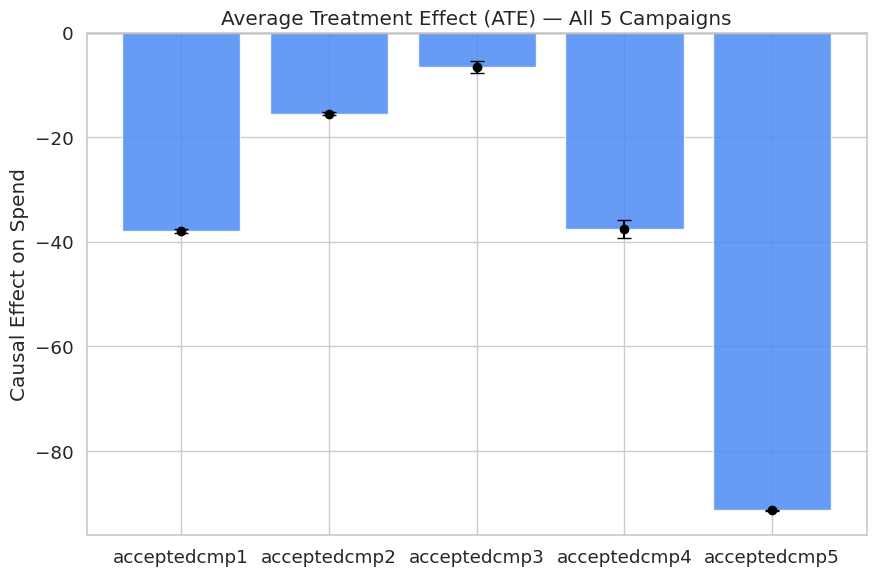

In [169]:
import matplotlib.pyplot as plt
import numpy as np

campaigns = ate_summary["Campaign"]
ates = ate_summary["ATE"]
ci_low = ate_summary["CI_low"]
ci_high = ate_summary["CI_high"]

lower_err = ates - ci_low
upper_err = ci_high - ates
yerr = [lower_err, upper_err]

plt.figure(figsize=(9,6))
plt.bar(campaigns, ates, color="#4C8BF5", alpha=0.85)
plt.errorbar(campaigns, ates, yerr=yerr, fmt='o', color="black", capsize=5)

plt.axhline(0, color="gray", linewidth=1)
plt.title("Average Treatment Effect (ATE) — All 5 Campaigns")
plt.ylabel("Causal Effect on Spend")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


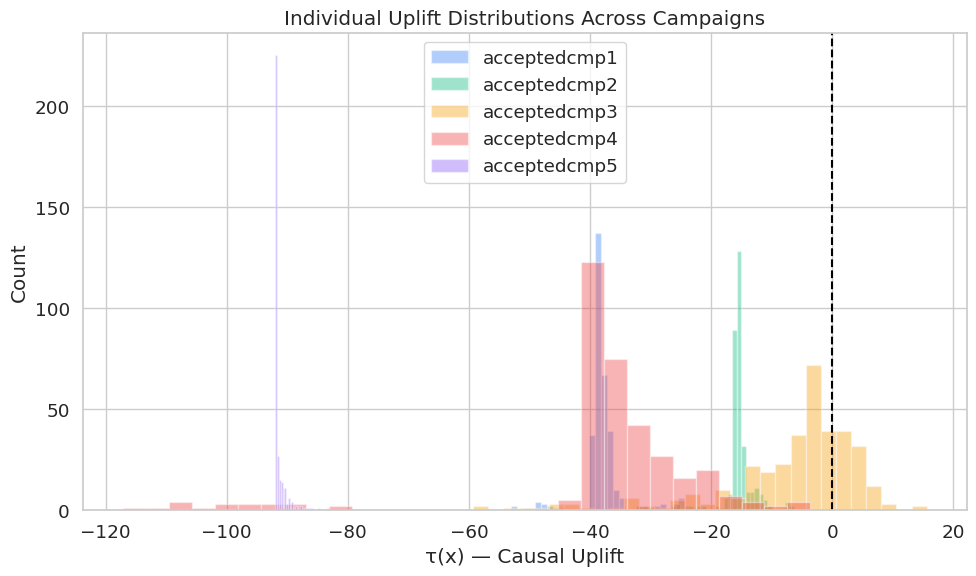

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

colors = ["#3B82F6", "#10B981", "#F59E0B", "#EF4444", "#8B5CF6"]

for i, col in enumerate(campaign_cols):
    tau_vals = phd_results[col]["tau_hat"]
    plt.hist(tau_vals, bins=30, alpha=0.4, color=colors[i], label=col)

plt.axvline(0, color="black", linestyle="--")
plt.title("Individual Uplift Distributions Across Campaigns")
plt.xlabel("τ(x) — Causal Uplift")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-1418937579.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


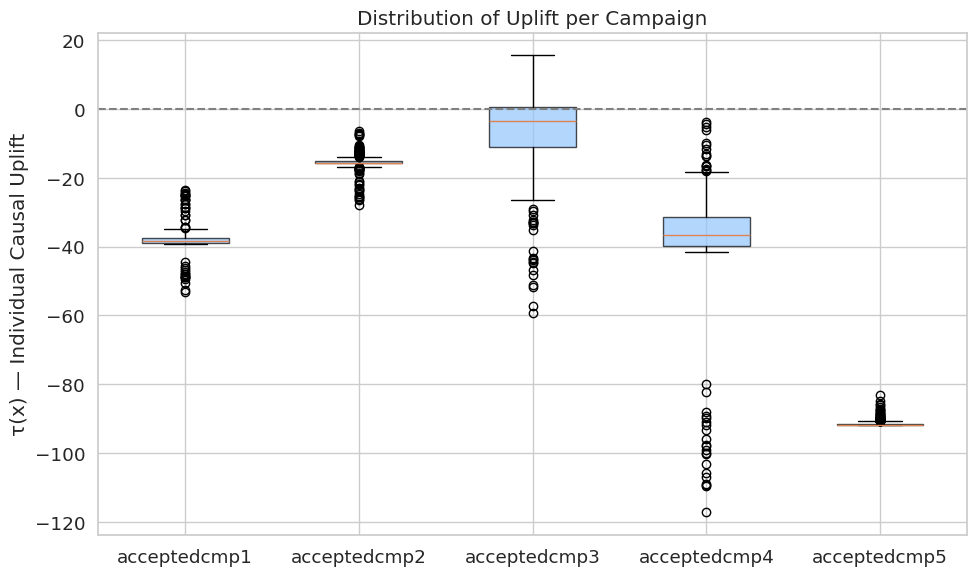

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

data = [phd_results[c]["tau_hat"] for c in campaign_cols]

plt.boxplot(
    data,
    labels=campaign_cols,
    patch_artist=True,
    boxprops=dict(facecolor="#93C5FD", alpha=0.7)
)

plt.axhline(0, color="gray", linestyle="--")
plt.title("Distribution of Uplift per Campaign")
plt.ylabel("τ(x) — Individual Causal Uplift")

plt.tight_layout()
plt.show()


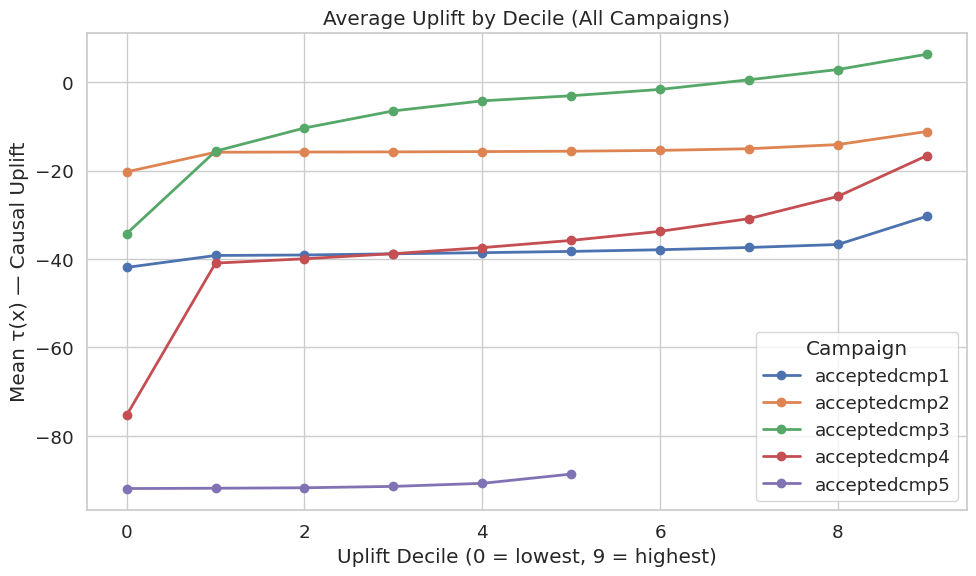

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for col in campaign_cols:
    seg = seg_summary_all[seg_summary_all["Campaign"] == col]
    plt.plot(seg["uplift_decile"], seg["mean"], marker="o", linewidth=2, label=col)

plt.title("Average Uplift by Decile (All Campaigns)")
plt.xlabel("Uplift Decile (0 = lowest, 9 = highest)")
plt.ylabel("Mean τ(x) — Causal Uplift")
plt.legend(title="Campaign")
plt.tight_layout()
plt.show()


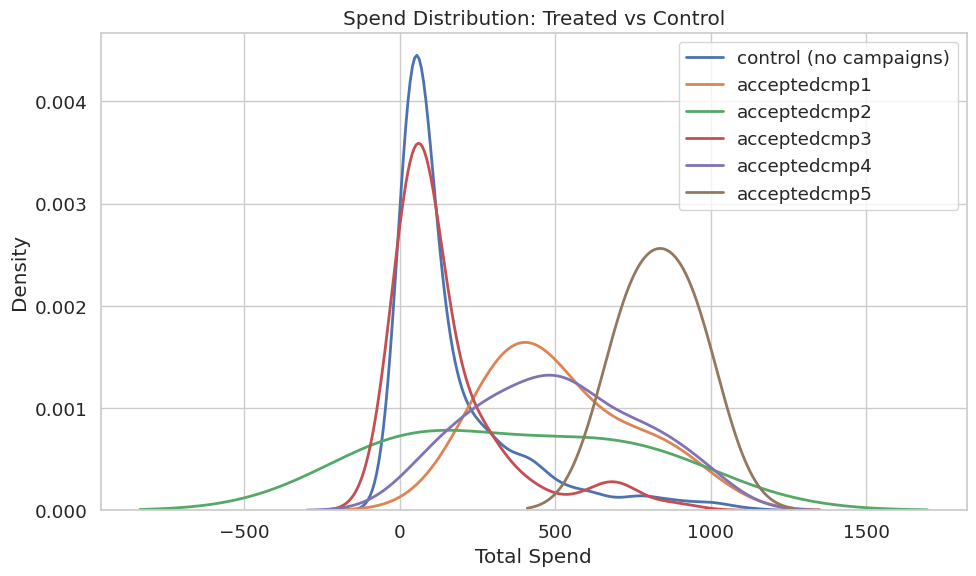

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

control_mask = (df_model["accepted_any"] == 0)
control_spend = df_model.loc[control_mask, "total_spend"]

sns.kdeplot(control_spend, label="control (no campaigns)", linewidth=2)

for col in campaign_cols:
    sns.kdeplot(df_model.loc[df_model[col] == 1, "total_spend"], linewidth=2, label=col)

plt.title("Spend Distribution: Treated vs Control")
plt.xlabel("Total Spend")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


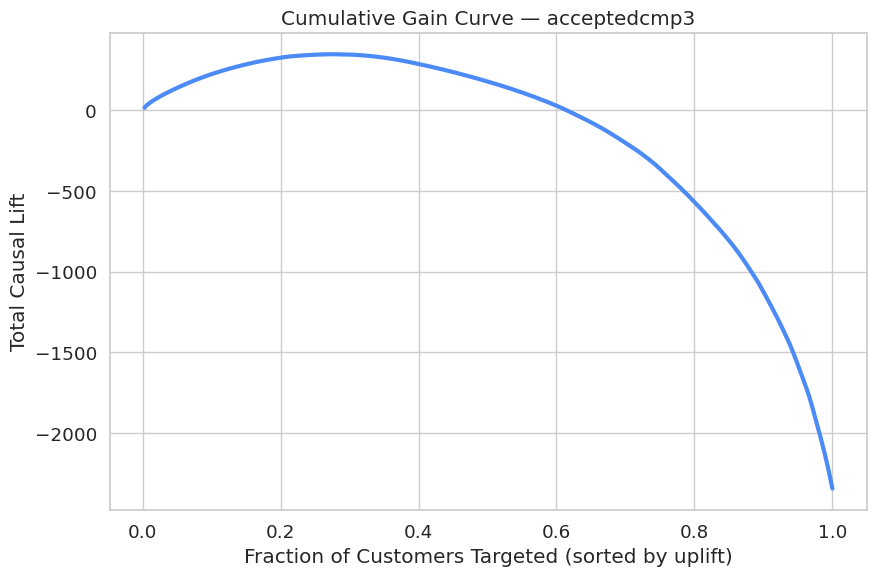

In [174]:
import numpy as np
import matplotlib.pyplot as plt

best_campaign = ate_summary.loc[ate_summary["ATE"].idxmax(), "Campaign"]
tau_vals = phd_results[best_campaign]["tau_hat"]

sorted_tau = np.sort(tau_vals)[::-1]
cumulative_gain = np.cumsum(sorted_tau)
fraction = np.arange(1, len(sorted_tau) + 1) / len(sorted_tau)

plt.figure(figsize=(9,6))
plt.plot(fraction, cumulative_gain, linewidth=3, color="#4C8BF5")

plt.title(f"Cumulative Gain Curve — {best_campaign}")
plt.xlabel("Fraction of Customers Targeted (sorted by uplift)")
plt.ylabel("Total Causal Lift")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3171713817.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=labels, y=vals, palette="Set3", inner="quartile")


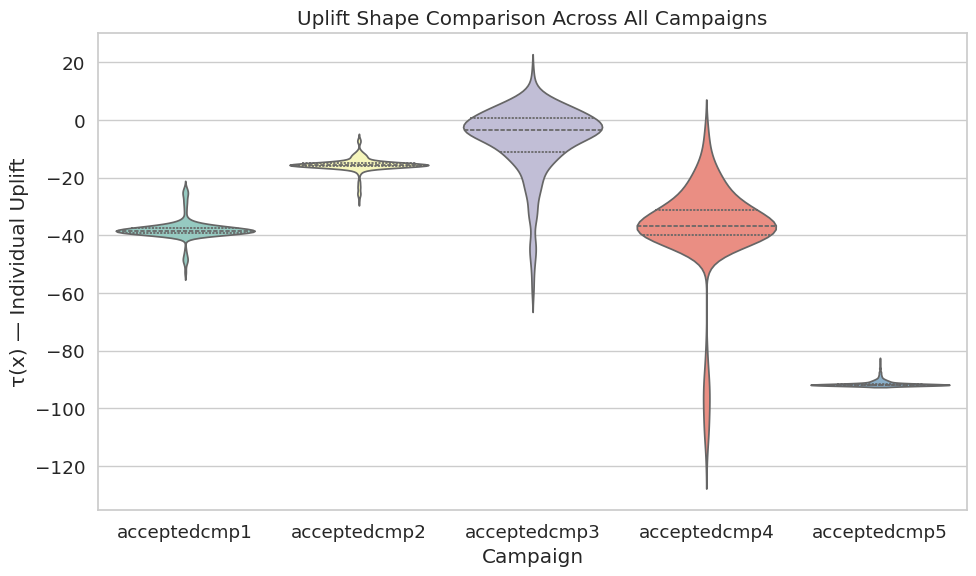

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

vals = []
labels = []

for c in campaign_cols:
    vals.extend(phd_results[c]["tau_hat"])
    labels.extend([c] * len(phd_results[c]["tau_hat"]))

sns.violinplot(x=labels, y=vals, palette="Set3", inner="quartile")

plt.title("Uplift Shape Comparison Across All Campaigns")
plt.xlabel("Campaign")
plt.ylabel("τ(x) — Individual Uplift")
plt.tight_layout()
plt.show()


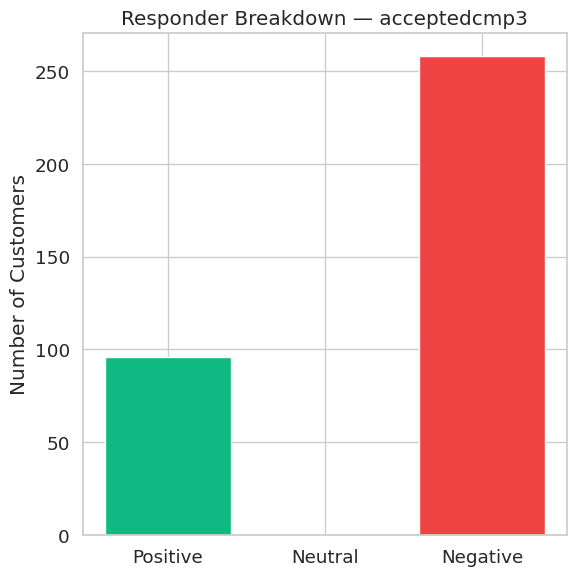

In [178]:
import matplotlib.pyplot as plt

best_campaign = ate_summary.loc[ate_summary["ATE"].idxmax(), "Campaign"]
tau = phd_results[best_campaign]["tau_hat"]

num_positive = (tau > 0).sum()
num_zero = (tau == 0).sum()
num_negative = (tau < 0).sum()

plt.figure(figsize=(6,6))
plt.bar(["Positive", "Neutral", "Negative"],
        [num_positive, num_zero, num_negative],
        color=["#10B981","#6B7280","#EF4444"])

plt.title(f"Responder Breakdown — {best_campaign}")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


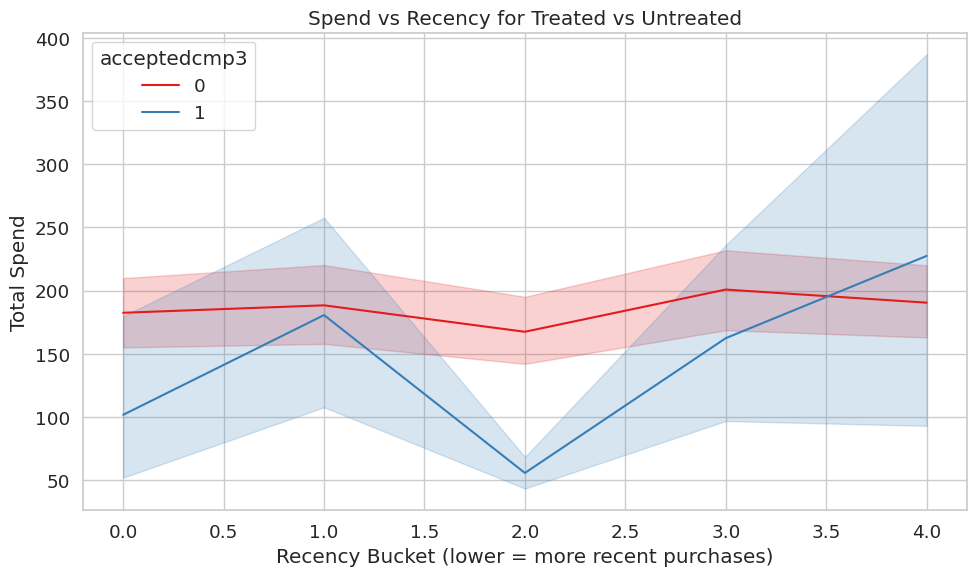

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# approximate pre vs post by using recency buckets
df_temp = df_model.copy()
df_temp["recent_bucket"] = pd.qcut(df_temp["recency"], 5, labels=False)

plt.figure(figsize=(10,6))
sns.lineplot(data=df_temp, x="recent_bucket", y="total_spend",
             hue=df_temp[best_campaign], palette="Set1")

plt.title("Spend vs Recency for Treated vs Untreated")
plt.xlabel("Recency Bucket (lower = more recent purchases)")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()


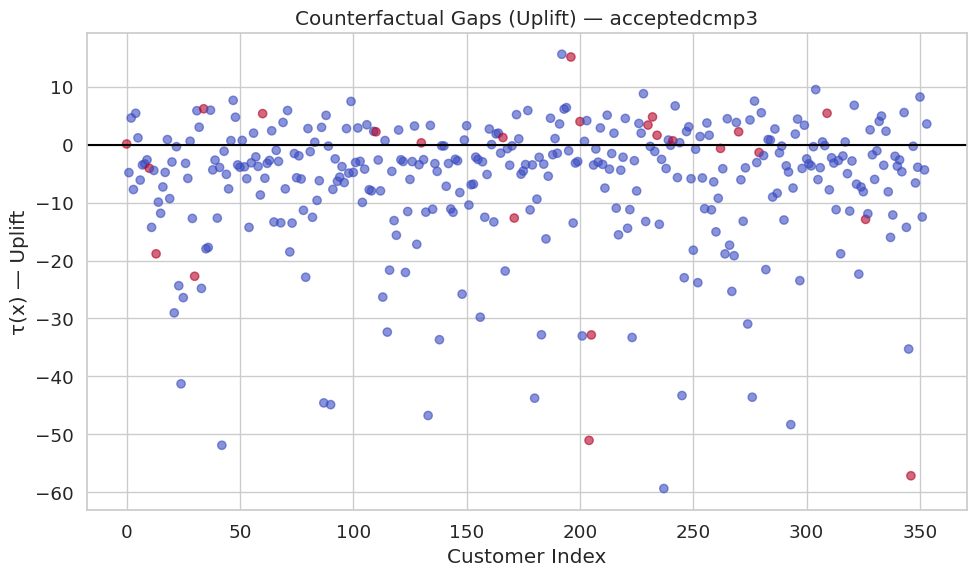

In [180]:
import matplotlib.pyplot as plt
import numpy as np

best_campaign = ate_summary.loc[ate_summary["ATE"].idxmax(), "Campaign"]
tau = phd_results[best_campaign]["tau_hat"]
T_test = phd_results[best_campaign]["T_test"]

plt.figure(figsize=(10,6))
plt.scatter(range(len(tau)), tau, c=T_test, cmap="coolwarm", alpha=0.6)

plt.axhline(0, color="black")
plt.title(f"Counterfactual Gaps (Uplift) — {best_campaign}")
plt.xlabel("Customer Index")
plt.ylabel("τ(x) — Uplift")
plt.tight_layout()
plt.show()


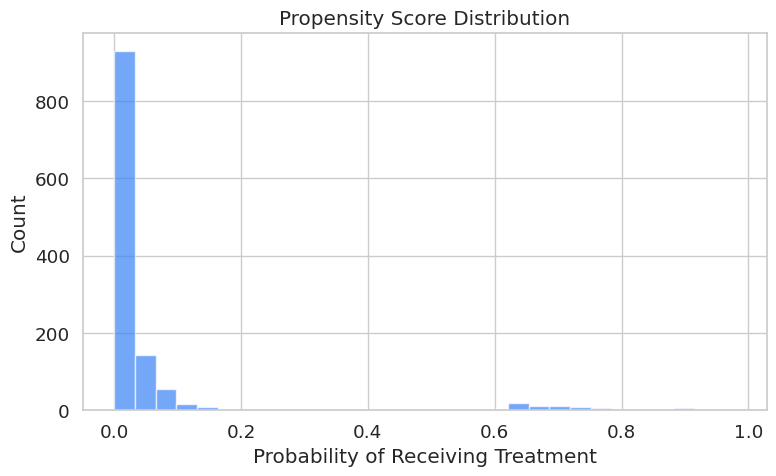

In [181]:
from sklearn.ensemble import RandomForestClassifier

prop_model = RandomForestClassifier()
prop_model.fit(X, df_model[best_campaign])

propensity_scores = prop_model.predict_proba(X)[:,1]

plt.figure(figsize=(8,5))
plt.hist(propensity_scores, bins=30, color="#3B82F6", alpha=0.7)
plt.title("Propensity Score Distribution")
plt.xlabel("Probability of Receiving Treatment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


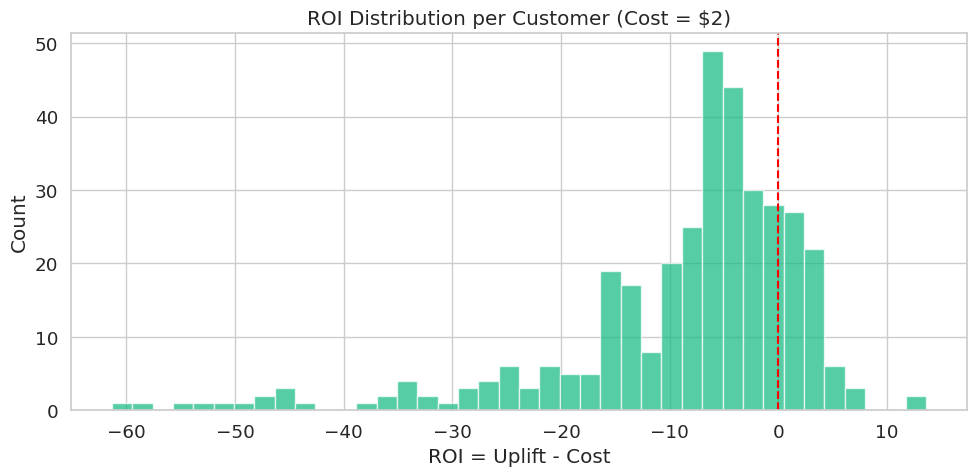

In [182]:
import numpy as np
import matplotlib.pyplot as plt

cost_per_campaign = 2  # CHANGE THIS IF YOU WANT

best_campaign = ate_summary.loc[ate_summary["ATE"].idxmax(), "Campaign"]
tau = phd_results[best_campaign]["tau_hat"]

roi = tau - cost_per_campaign

plt.figure(figsize=(10,5))
plt.hist(roi, bins=40, color="#10B981", alpha=0.7)
plt.axvline(0, color="red", linestyle="--")

plt.title(f"ROI Distribution per Customer (Cost = ${cost_per_campaign})")
plt.xlabel("ROI = Uplift - Cost")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
